In [40]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [2]:
stay_at_home_df = pd.read_csv("dataset/Stay at home.csv")

In [3]:
stay_at_home_df.head()

iso_code      continent   location        date  total_cases  new_cases  \
0      ARG  South America  Argentina  2020-03-11         19.0        7.0   
1      ARG  South America  Argentina  2020-03-13         31.0       12.0   
2      ARG  South America  Argentina  2020-03-14         34.0        3.0   
3      ARG  South America  Argentina  2020-03-15         45.0       11.0   
4      ARG  South America  Argentina  2020-03-16         56.0       11.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           1.0         0.0                    0.420                  0.155   
1           1.0         0.0                    0.686                  0.266   
2           2.0         1.0                    0.752                  0.066   
3           2.0         0.0                    0.996                  0.243   
4           2.0         0.0                    1.239                  0.243   

   ...  diabetes_prevalence  female_smokers  male_smokers  life_expectancy  \
0  ...                  5.5            16.2          27.7            76.67   
1  ...                  5.5            16.2          27.7            76.67   
2  ...                  5.5            16.2          27.7            76.67   
3  ...                  5.5            16.2          27.7            76.67   
4  ...                  5.5            16.2          27.7            76.67   

   DateTime_Out     Entity  Code    Right_Date  \
0    2020-03-11  Argentina   ARG  Mar 11, 2020   
1    2020-03-13  Argentina   ARG  Mar 13, 2020   
2    2020-03-14  Argentina   ARG  Mar 14, 2020   
3    2020-03-15  Argentina   ARG  Mar 15, 2020   
4    2020-03-16  Argentina   ARG  Mar 16, 2020   

   Stay at home requirements (OxBSG) Right_DateTime_Out  
0                                  0         2020-03-11  
1                                  0         2020-03-13  
2                                  0         2020-03-14  
3                                  0         2020-03-15  
4                                  0         2020-03-16  

[5 rows x 38 columns]

In [4]:
cleaned_stay_at_home_df = stay_at_home_df[['location','date','total_cases','total_tests','stringency_index','positive_rate','Stay at home requirements (OxBSG)','total_deaths']]

In [5]:
cleaned_stay_at_home_df

location        date  total_cases  total_tests  stringency_index  \
0     Argentina  2020-03-11         19.0        158.0             25.00   
1     Argentina  2020-03-13         31.0        282.0             25.00   
2     Argentina  2020-03-14         34.0        331.0             25.00   
3     Argentina  2020-03-15         45.0        410.0             25.00   
4     Argentina  2020-03-16         56.0        510.0             41.67   
...         ...         ...          ...          ...               ...   
8612   Zimbabwe  2020-07-25       2296.0      52007.0             80.56   
8613   Zimbabwe  2020-07-26       2434.0      53346.0             80.56   
8614   Zimbabwe  2020-07-27       2512.0      54831.0             80.56   
8615   Zimbabwe  2020-07-28       2704.0      56000.0             80.56   
8616   Zimbabwe  2020-07-29       2817.0      57791.0             80.56   

      positive_rate  Stay at home requirements (OxBSG)  total_deaths  
0             0.151                                  0           1.0  
1             0.126                                  0           1.0  
2             0.098                                  0           2.0  
3             0.112                                  0           2.0  
4             0.107                                  0           2.0  
...             ...                                ...           ...  
8612          0.077                                  2          32.0  
8613          0.080                                  2          34.0  
8614          0.070                                  2          34.0  
8615          0.074                                  2          36.0  
8616          0.070                                  2          40.0  

[8617 rows x 8 columns]

In [6]:
cleaned_stay_at_home_df['cases_per_tests_ratio'] = cleaned_stay_at_home_df['total_cases']/cleaned_stay_at_home_df['total_tests']

<ipython-input-6-7495fc415623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_stay_at_home_df['cases_per_tests_ratio'] = cleaned_stay_at_home_df['total_cases']/cleaned_stay_at_home_df['total_tests']


In [7]:
cleaned_stay_at_home_df

location        date  total_cases  total_tests  stringency_index  \
0     Argentina  2020-03-11         19.0        158.0             25.00   
1     Argentina  2020-03-13         31.0        282.0             25.00   
2     Argentina  2020-03-14         34.0        331.0             25.00   
3     Argentina  2020-03-15         45.0        410.0             25.00   
4     Argentina  2020-03-16         56.0        510.0             41.67   
...         ...         ...          ...          ...               ...   
8612   Zimbabwe  2020-07-25       2296.0      52007.0             80.56   
8613   Zimbabwe  2020-07-26       2434.0      53346.0             80.56   
8614   Zimbabwe  2020-07-27       2512.0      54831.0             80.56   
8615   Zimbabwe  2020-07-28       2704.0      56000.0             80.56   
8616   Zimbabwe  2020-07-29       2817.0      57791.0             80.56   

      positive_rate  Stay at home requirements (OxBSG)  total_deaths  \
0             0.151                                  0           1.0   
1             0.126                                  0           1.0   
2             0.098                                  0           2.0   
3             0.112                                  0           2.0   
4             0.107                                  0           2.0   
...             ...                                ...           ...   
8612          0.077                                  2          32.0   
8613          0.080                                  2          34.0   
8614          0.070                                  2          34.0   
8615          0.074                                  2          36.0   
8616          0.070                                  2          40.0   

      cases_per_tests_ratio  
0                  0.120253  
1                  0.109929  
2                  0.102719  
3                  0.109756  
4                  0.109804  
...                     ...  
8612               0.044148  
8613               0.045627  
8614               0.045813  
8615               0.048286  
8616               0.048745  

[8617 rows x 9 columns]

In [8]:
dummies_column = pd.get_dummies(cleaned_stay_at_home_df['Stay at home requirements (OxBSG)'])

In [9]:
cleaned_stay_at_home_df = cleaned_stay_at_home_df.join(dummies_column)

In [10]:
cleaned_stay_at_home_df.head()

location        date  total_cases  total_tests  stringency_index  \
0  Argentina  2020-03-11         19.0        158.0             25.00   
1  Argentina  2020-03-13         31.0        282.0             25.00   
2  Argentina  2020-03-14         34.0        331.0             25.00   
3  Argentina  2020-03-15         45.0        410.0             25.00   
4  Argentina  2020-03-16         56.0        510.0             41.67   

   positive_rate  Stay at home requirements (OxBSG)  total_deaths  \
0          0.151                                  0           1.0   
1          0.126                                  0           1.0   
2          0.098                                  0           2.0   
3          0.112                                  0           2.0   
4          0.107                                  0           2.0   

   cases_per_tests_ratio  0  1  2  3  
0               0.120253  1  0  0  0  
1               0.109929  1  0  0  0  
2               0.102719  1  0  0  0  
3               0.109756  1  0  0  0  
4               0.109804  1  0  0  0

In [11]:
cleaned_stay_at_home_df.dtypes

location                              object
date                                  object
total_cases                          float64
total_tests                          float64
stringency_index                     float64
positive_rate                        float64
Stay at home requirements (OxBSG)      int64
total_deaths                         float64
cases_per_tests_ratio                float64
0                                      uint8
1                                      uint8
2                                      uint8
3                                      uint8
dtype: object

In [12]:
groupby_location_df = cleaned_stay_at_home_df.groupby('location',as_index=False)
separated_location_df = dict(iter(groupby_location_df))

In [14]:
separated_location_df['Australia'].head()

location        date  total_cases  total_tests  stringency_index  \
140  Australia  2020-04-06       5744.0     302663.0             75.93   
141  Australia  2020-04-07       5844.0     310700.0             75.93   
142  Australia  2020-04-08       5956.0     319368.0             75.93   
143  Australia  2020-04-09       6052.0     330134.0             75.93   
144  Australia  2020-04-10       6152.0     338346.0             75.93   

     positive_rate  Stay at home requirements (OxBSG)  total_deaths  \
140          0.021                                  2          36.0   
141          0.017                                  2          42.0   
142          0.018                                  2          45.0   
143          0.015                                  2          50.0   
144          0.014                                  2          52.0   

     cases_per_tests_ratio  0  1  2  3  
140               0.018978  0  0  1  0  
141               0.018809  0  0  1  0  
142               0.018649  0  0  1  0  
143               0.018332  0  0  1  0  
144               0.018183  0  0  1  0

In [60]:
def prophet_predicts(location_df):
    m = Prophet()
    test_df = location_df[['date','total_cases']]
    test_df = test_df.rename(columns={"date": "ds", "total_cases": "y"})
    m.fit(test_df)
    future = m.make_future_dataframe(periods=180)
    forecast = m.predict(future)
    m.plot(forecast).savefig(f'180 Days/{location}_forecast.png')
    m.plot_components(forecast).savefig(f'180 Days/{location}_components.png')
    #plot_plotly(m, forecast)
    #plot_components_plotly(m, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Argentina


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Australia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Austria


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bahrain


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bangladesh


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Belarus


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Belgium


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Bulgaria


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Canada


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chile


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Colombia


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/fbprophet/plot.py:66: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Costa Rica


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Croatia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Czech Republic


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Denmark


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


El Salvador


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Estonia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ethiopia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fiji


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Finland


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ghana


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Greece


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Hungary


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Iceland


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


India


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Indonesia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Iran


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ireland


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Israel


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Italy


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


Japan


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Kazakhstan


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Kenya


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Kuwait


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Latvia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Lithuania


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Luxembourg


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Malaysia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mexico


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Morocco


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Myanmar


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Nepal


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


New Zealand


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Nigeria


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Norway


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Pakistan


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Panama


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Paraguay


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Philippines


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Poland


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Portugal


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Qatar


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Romania


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Russia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Rwanda


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Saudi Arabia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Senegal


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Slovakia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Slovenia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


South Africa


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


South Korea


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Switzerland


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Thailand


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Togo


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Tunisia


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Turkey


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


Uganda


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Ukraine


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


United Arab Emirates


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


United Kingdom


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


United States


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Uruguay


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


Vietnam


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Zimbabwe


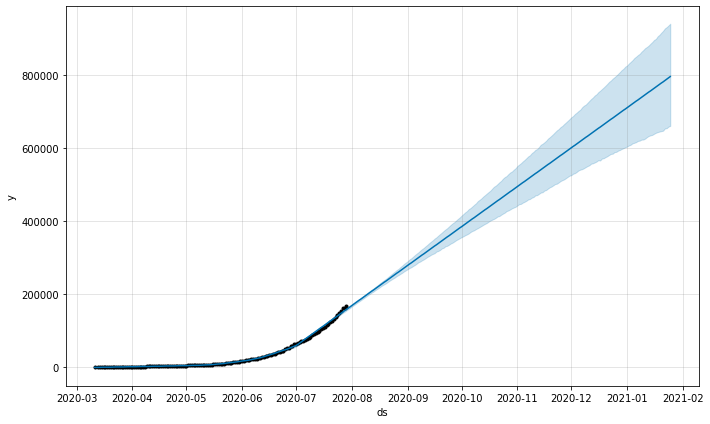

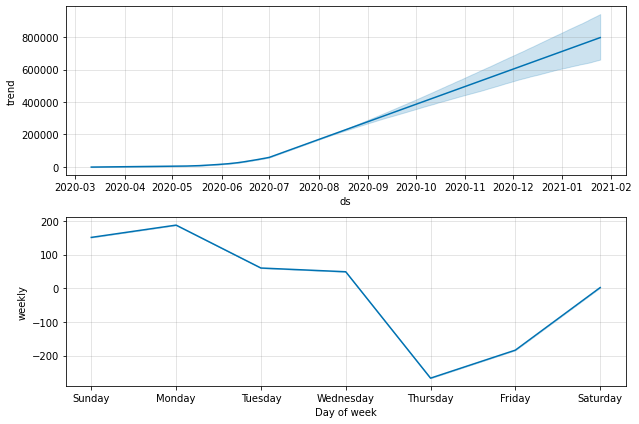

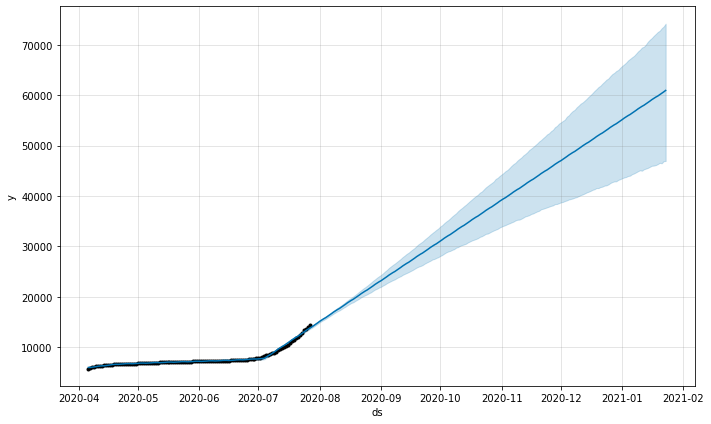

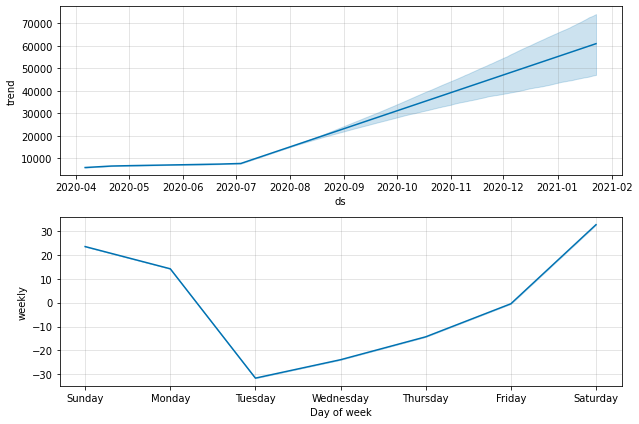

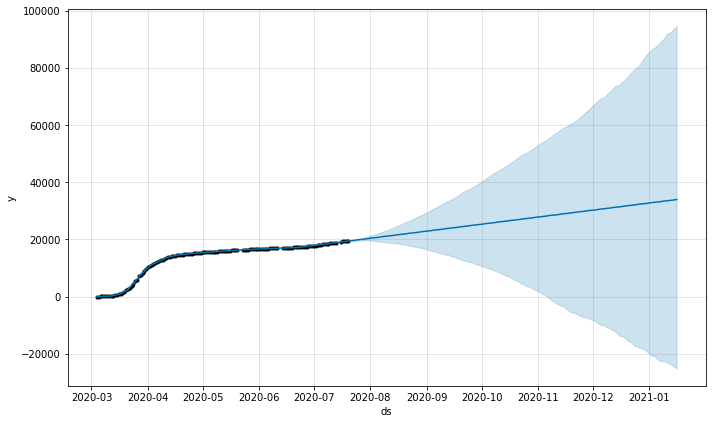

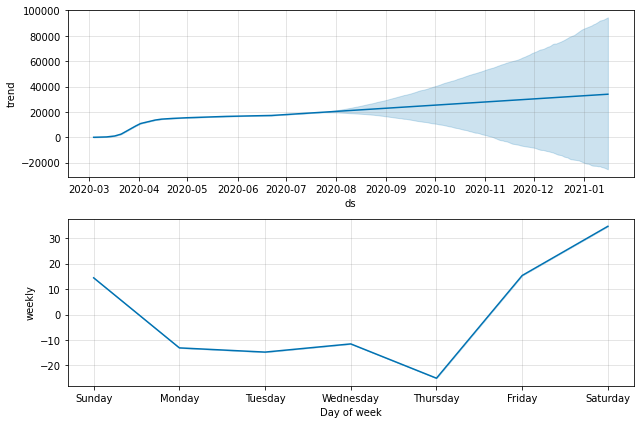

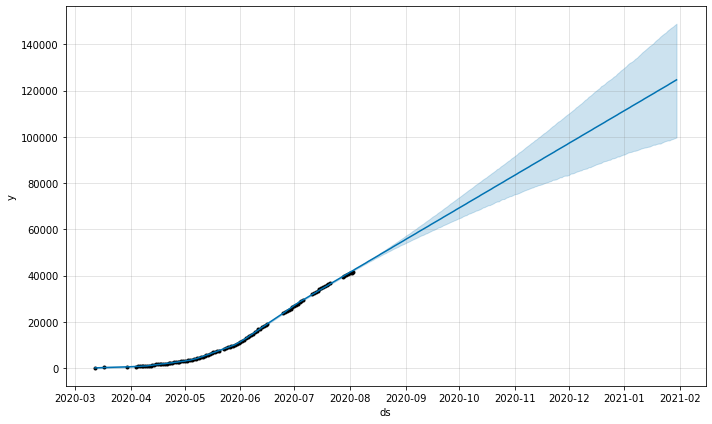

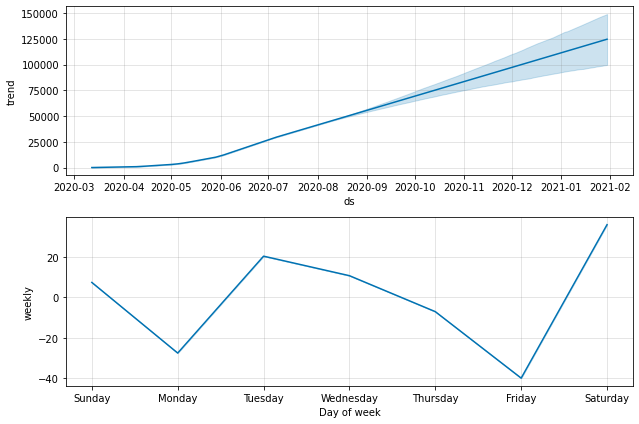

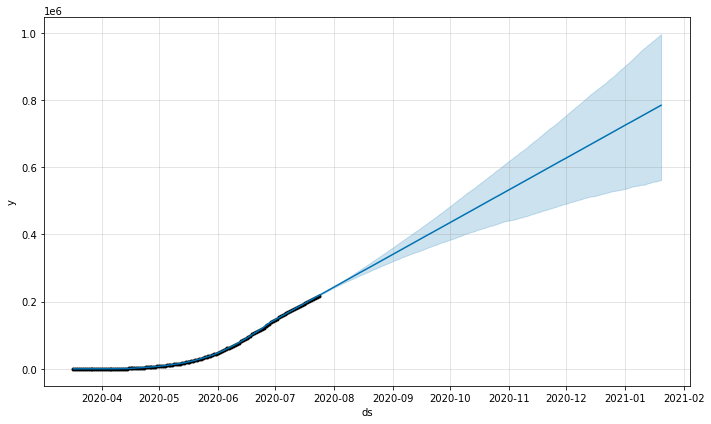

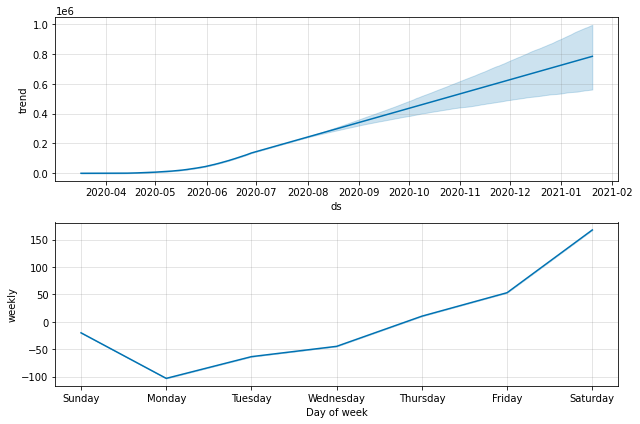

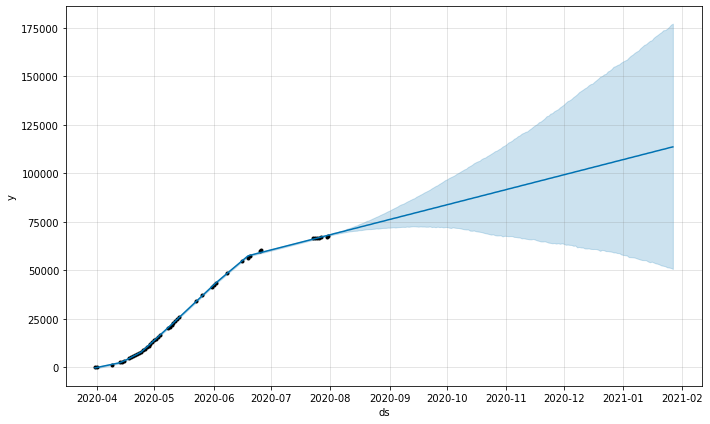

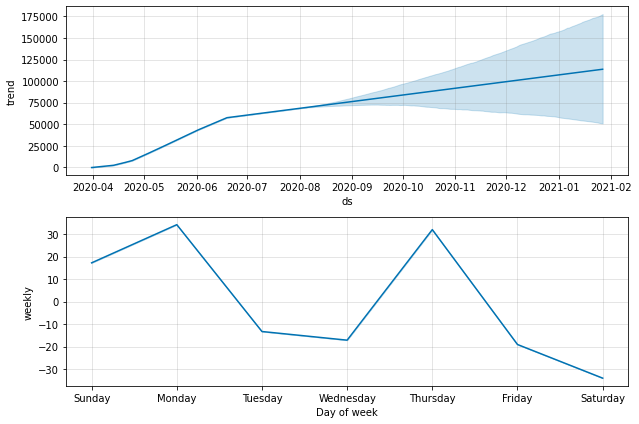

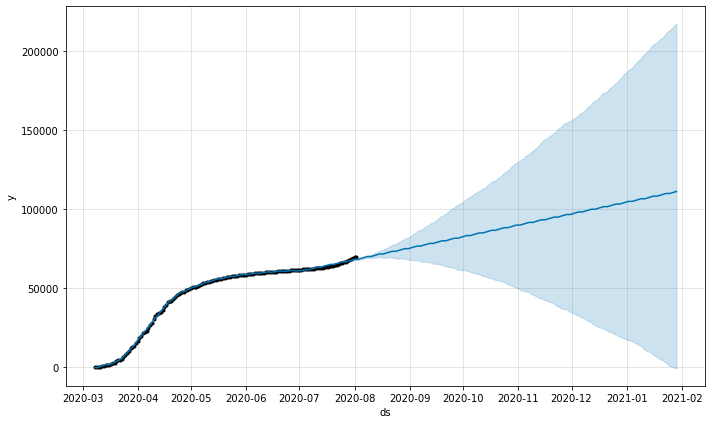

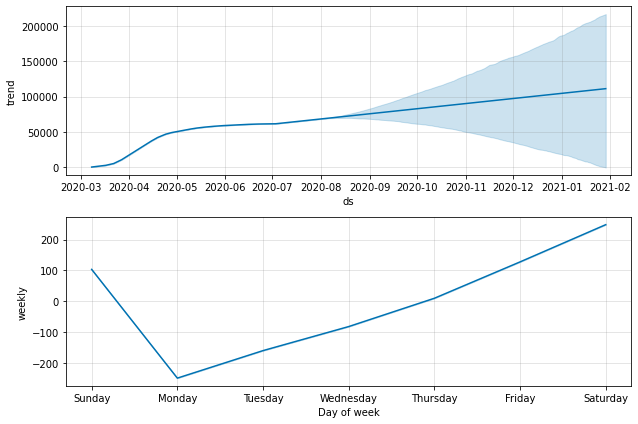

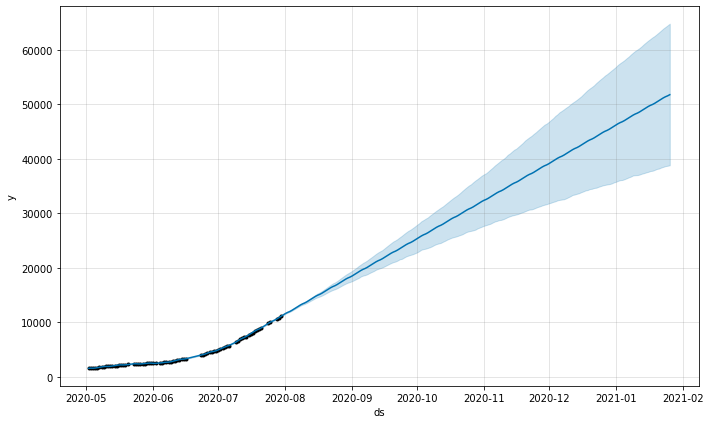

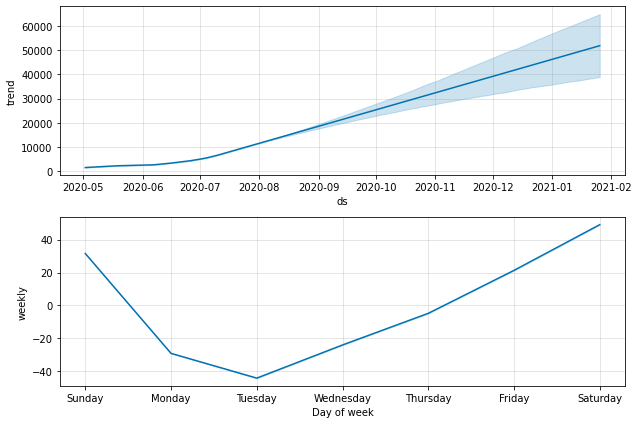

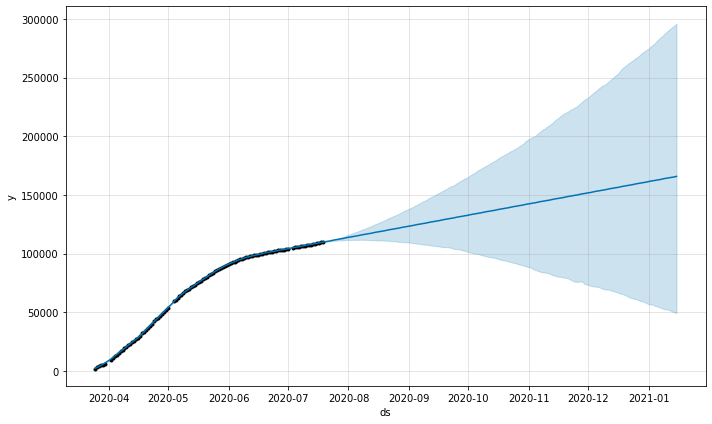

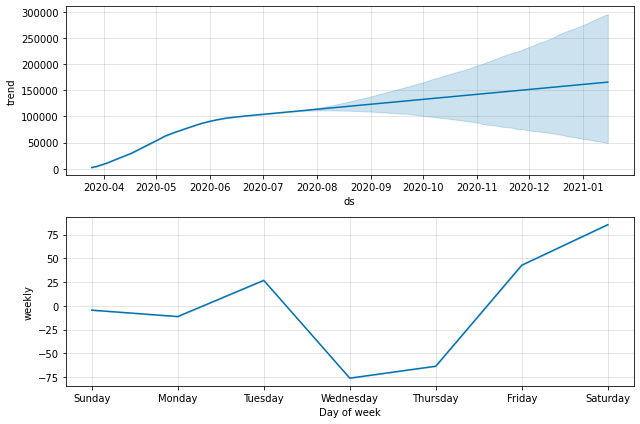

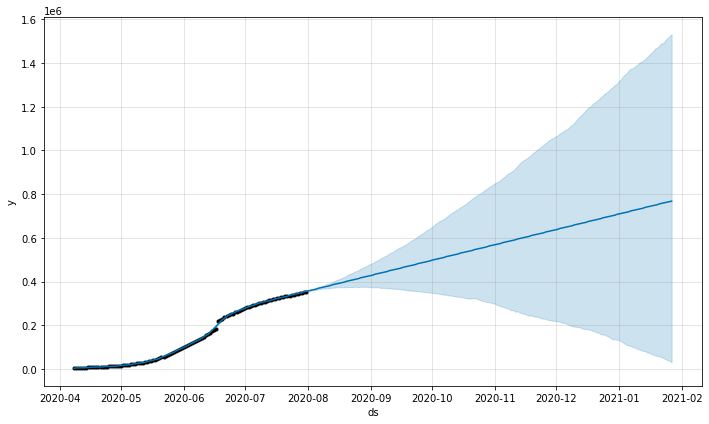

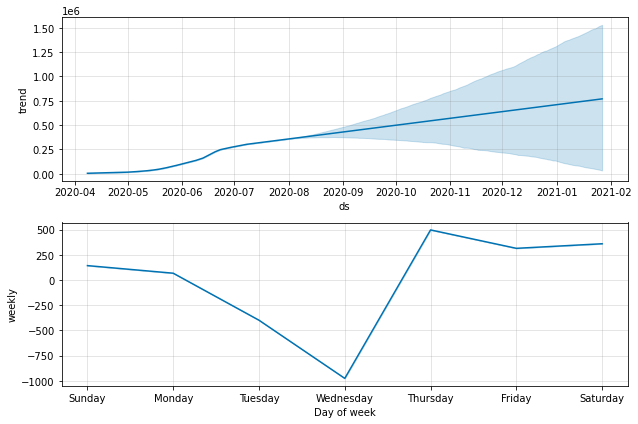

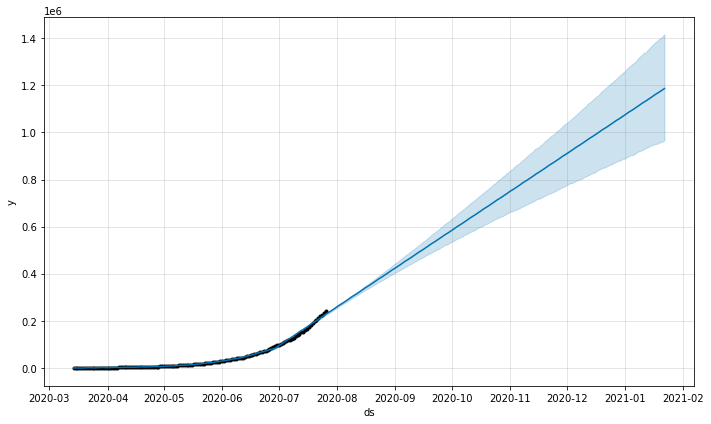

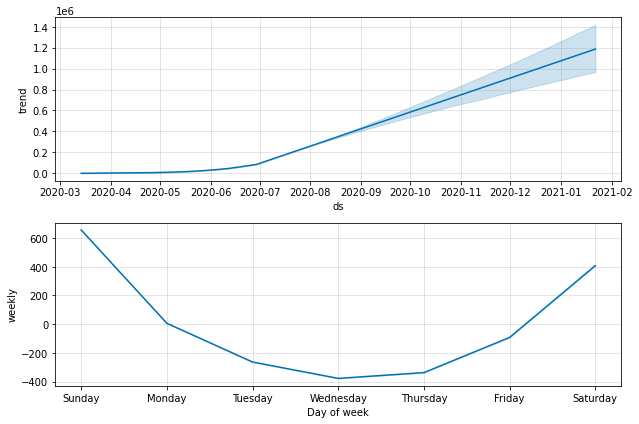

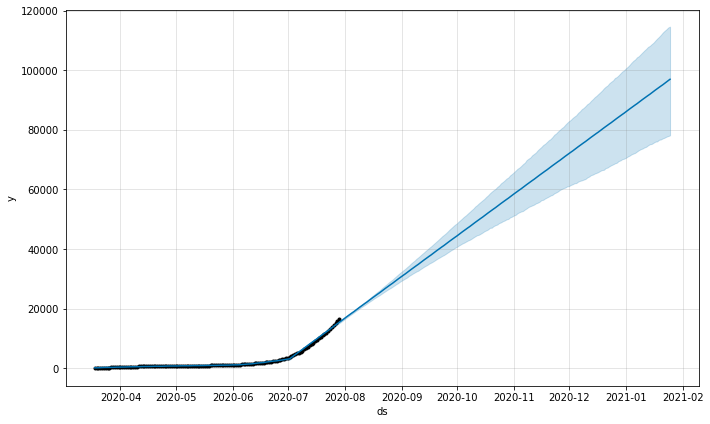

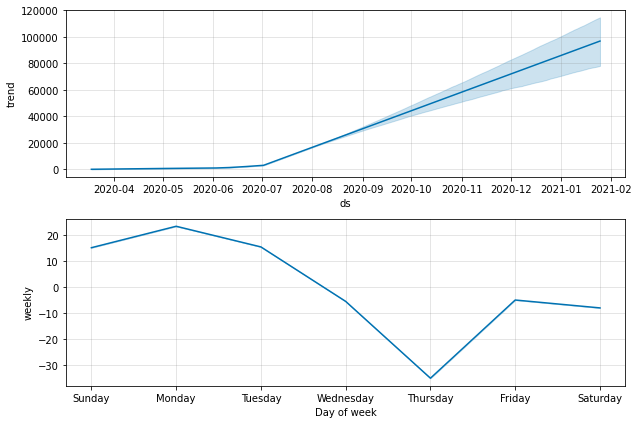

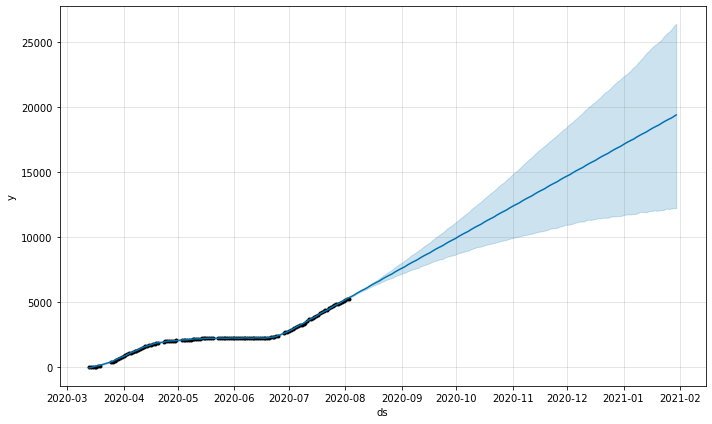

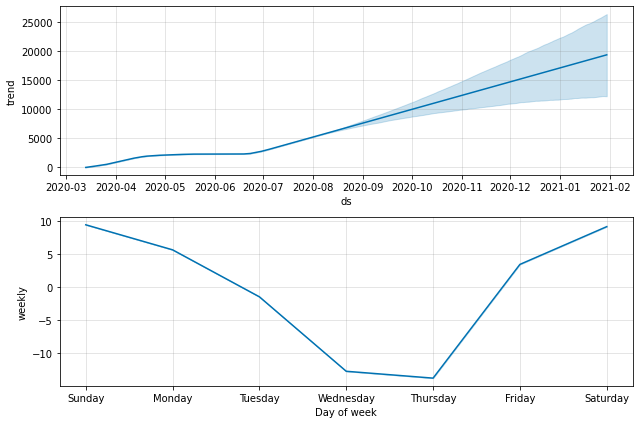

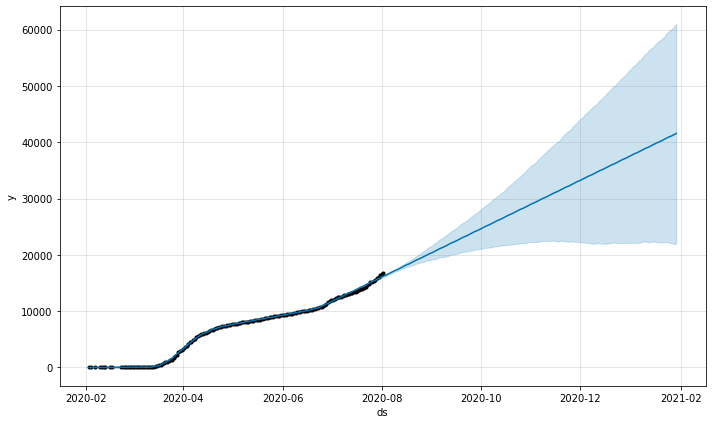

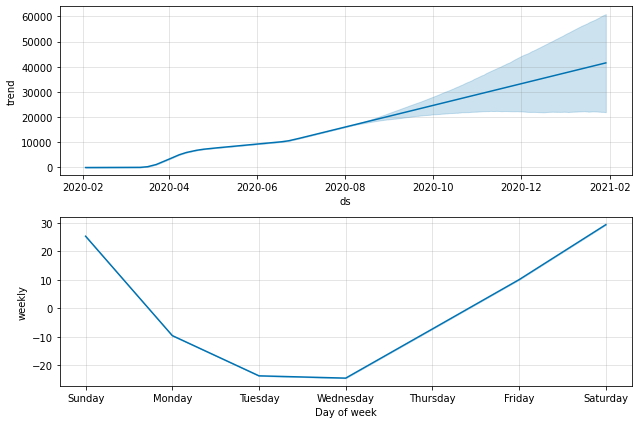

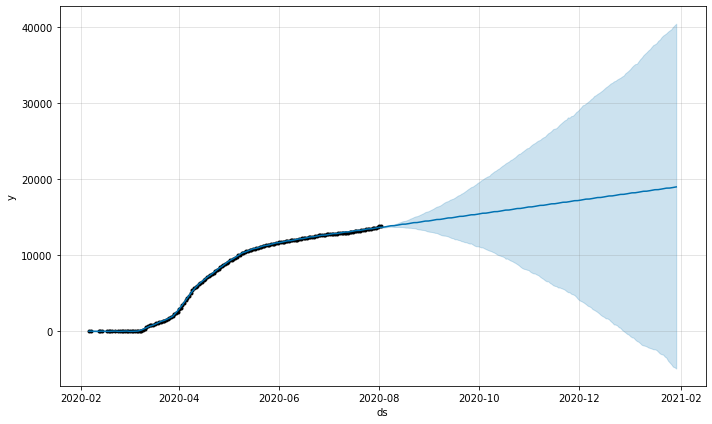

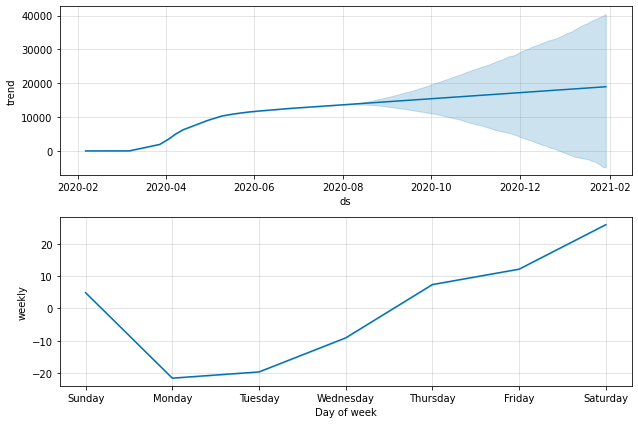

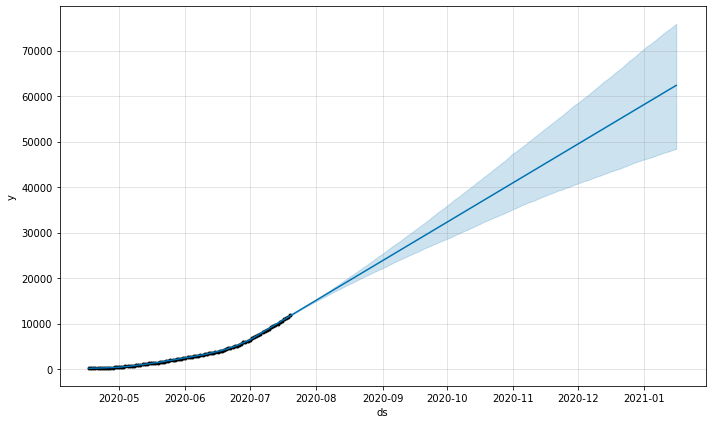

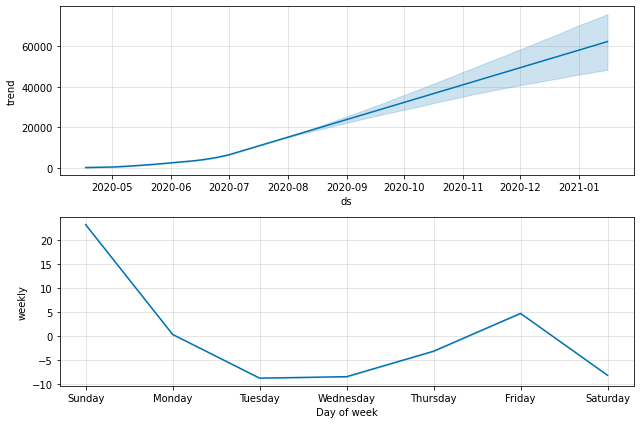

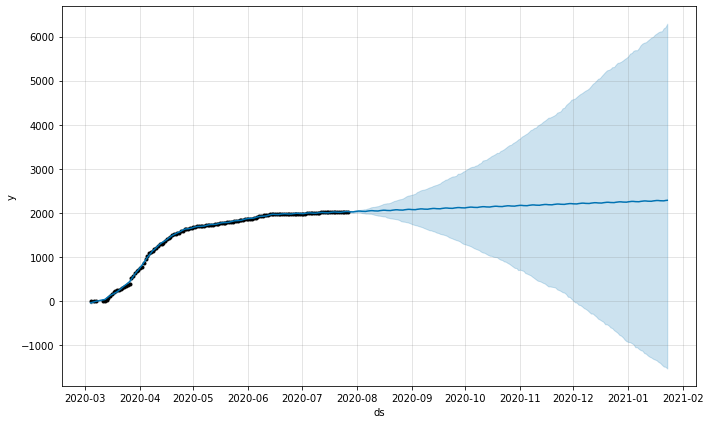

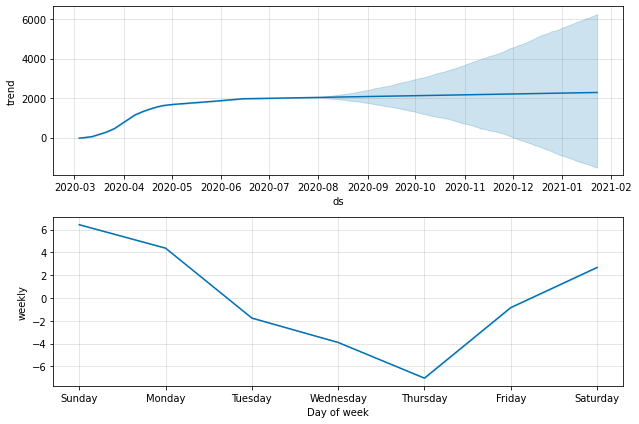

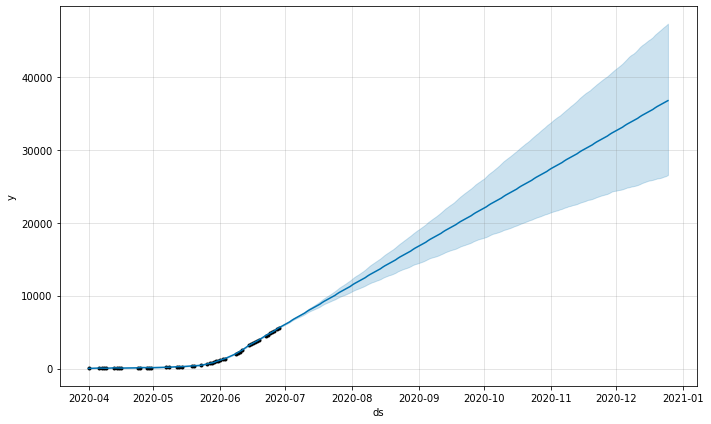

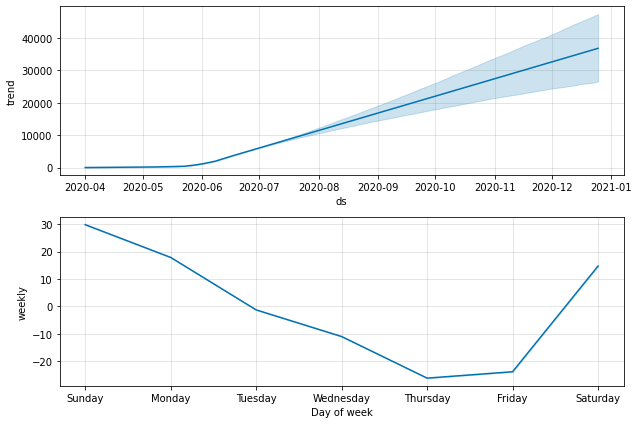

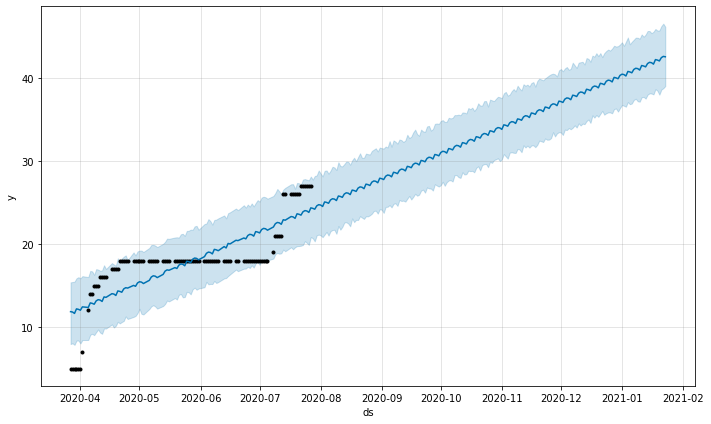

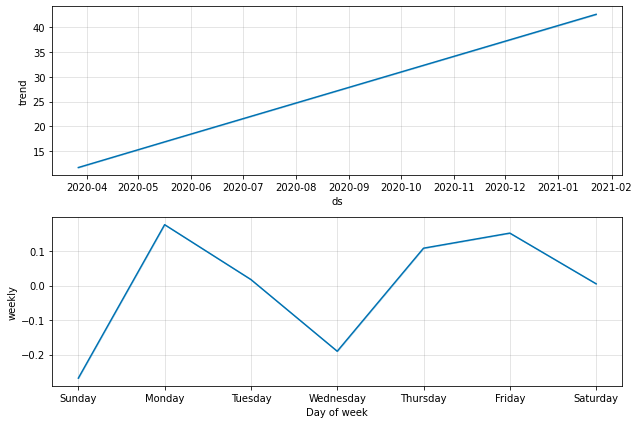

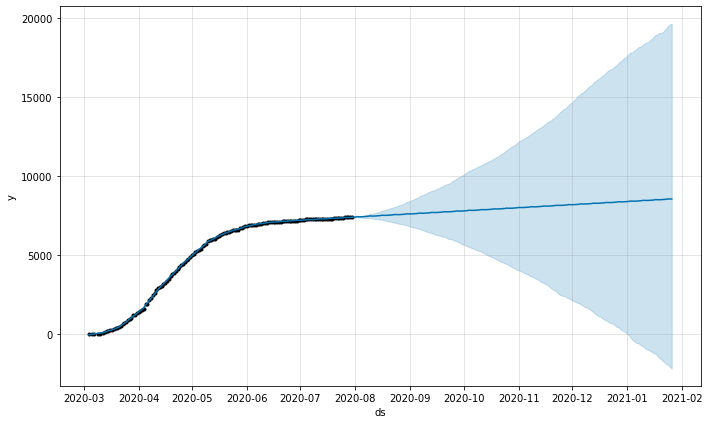

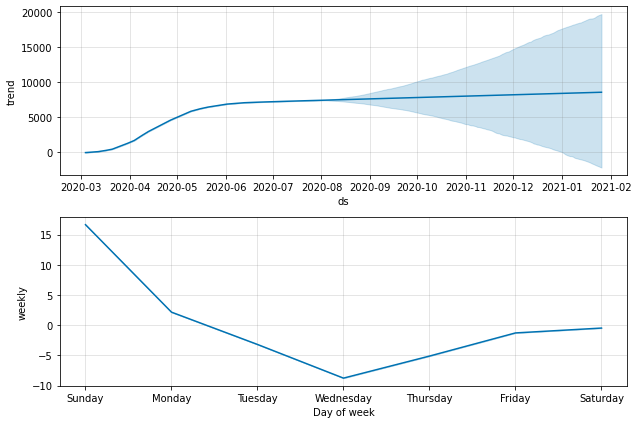

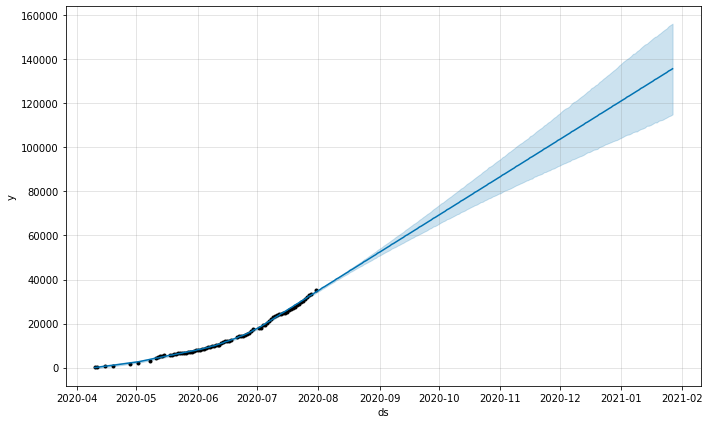

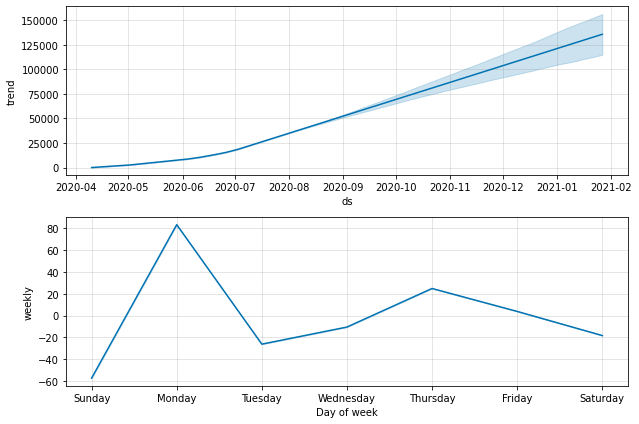

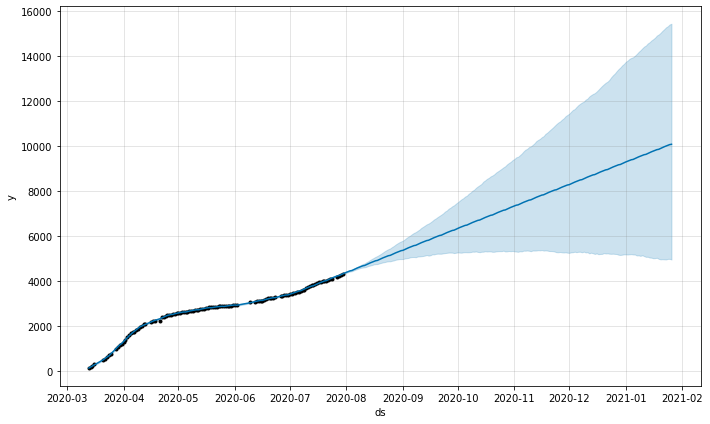

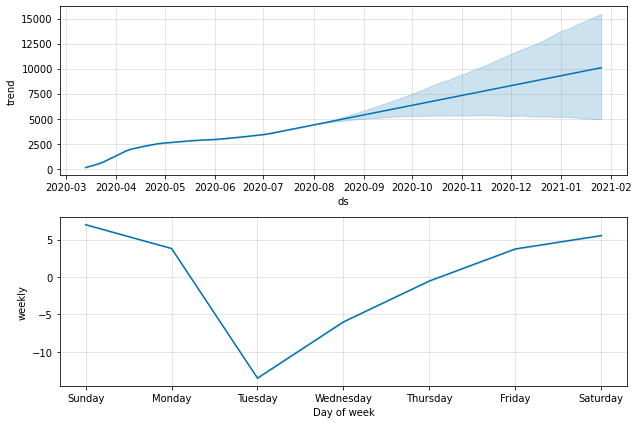

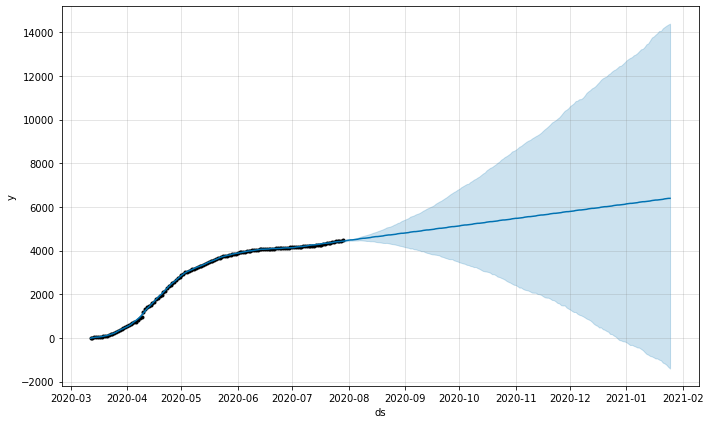

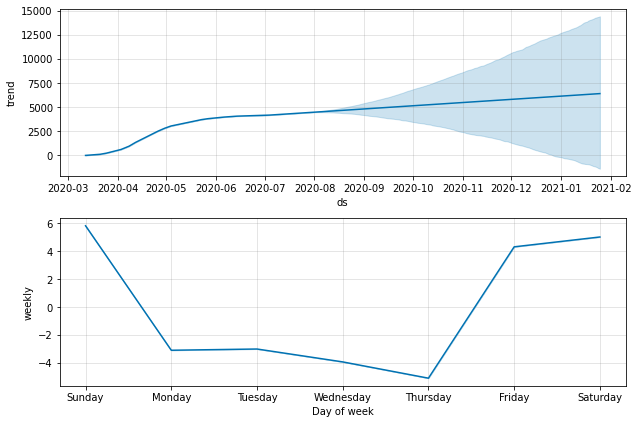

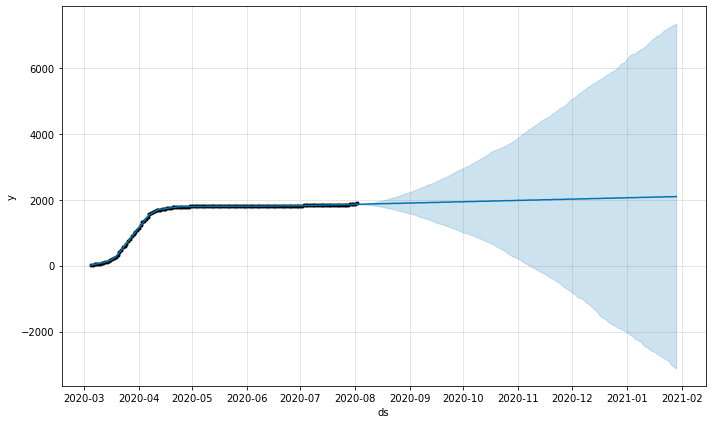

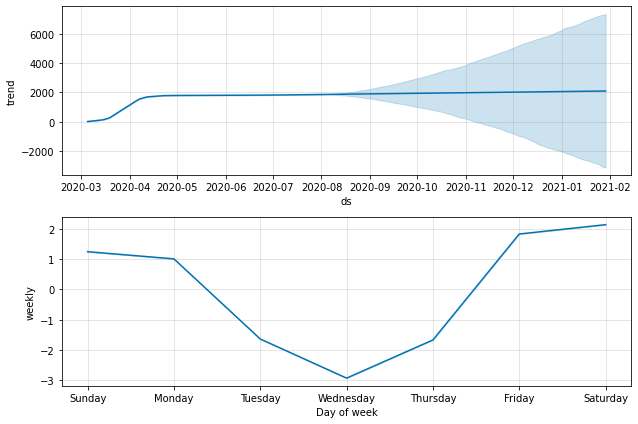

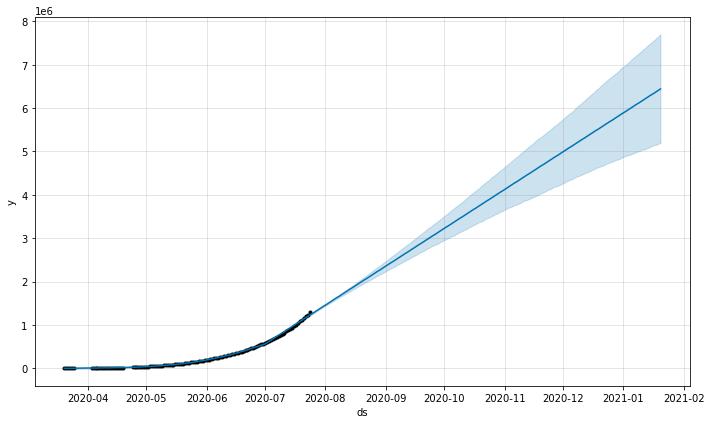

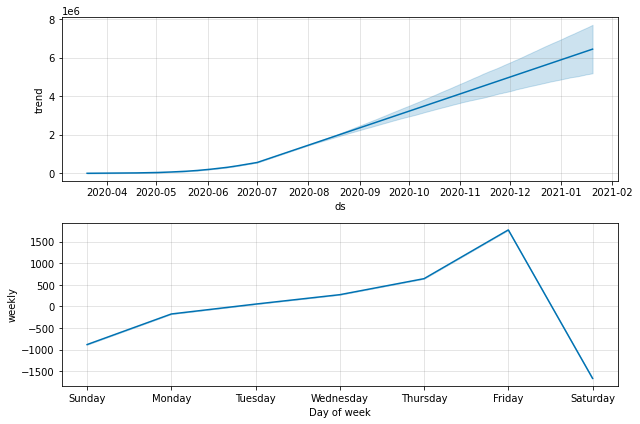

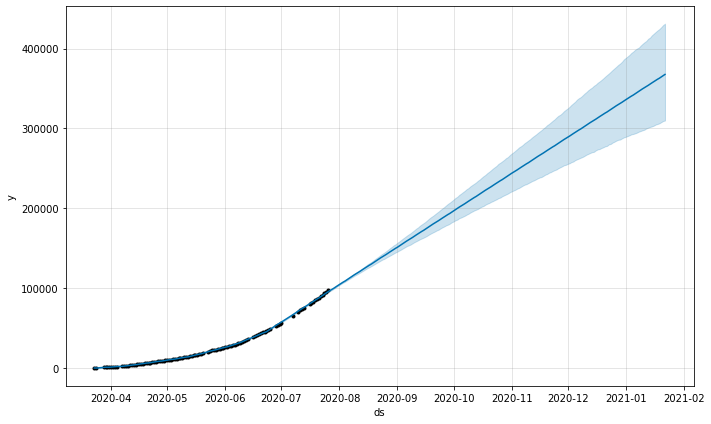

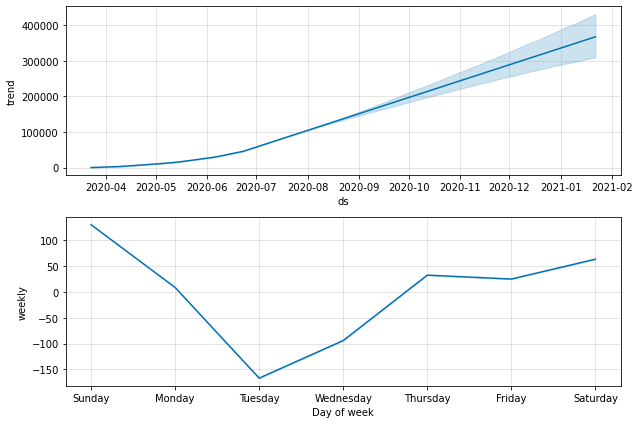

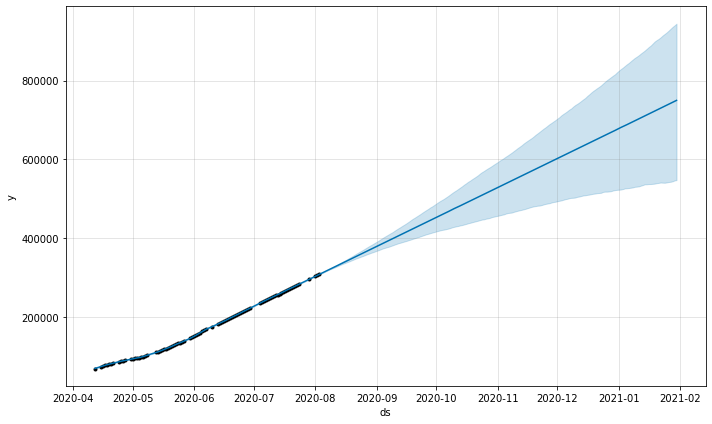

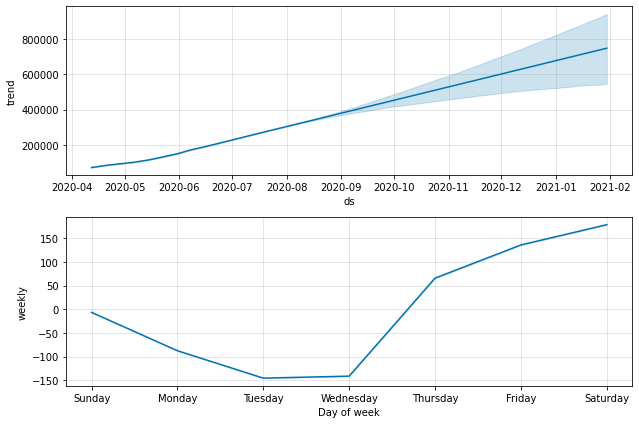

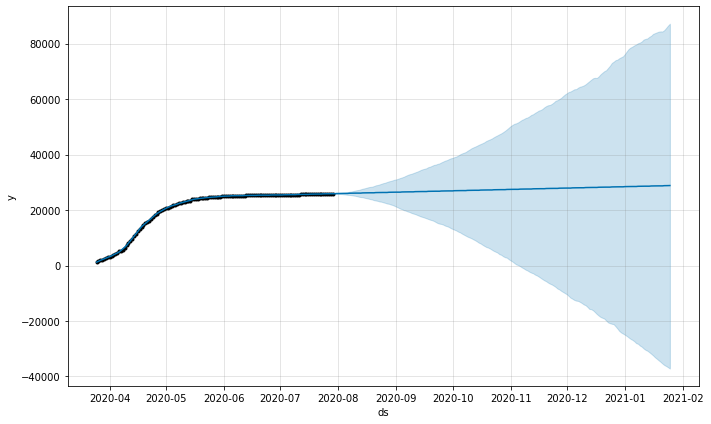

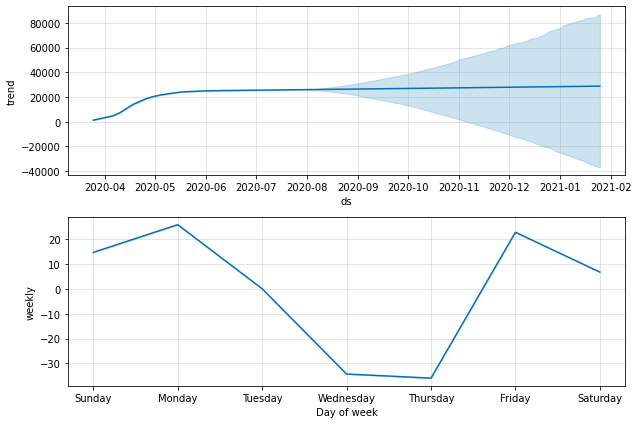

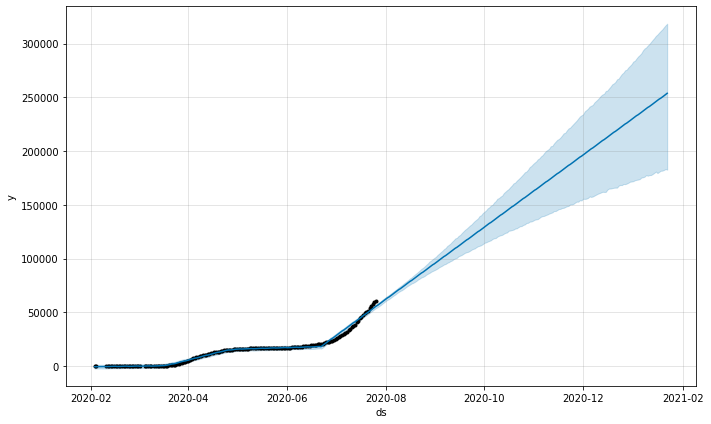

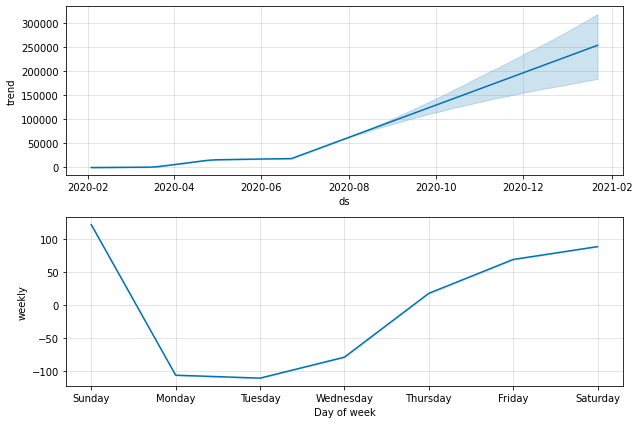

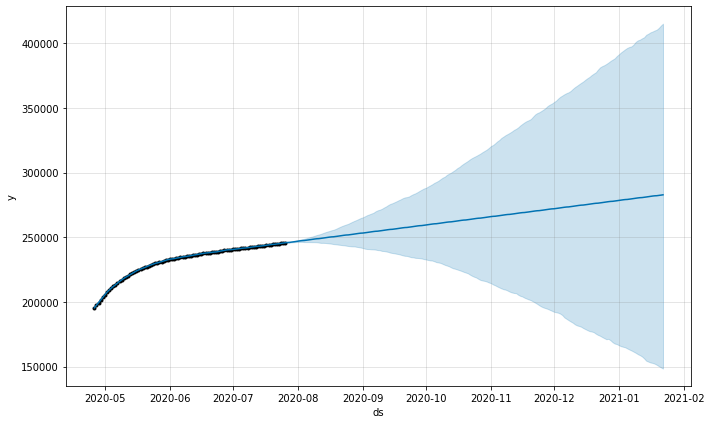

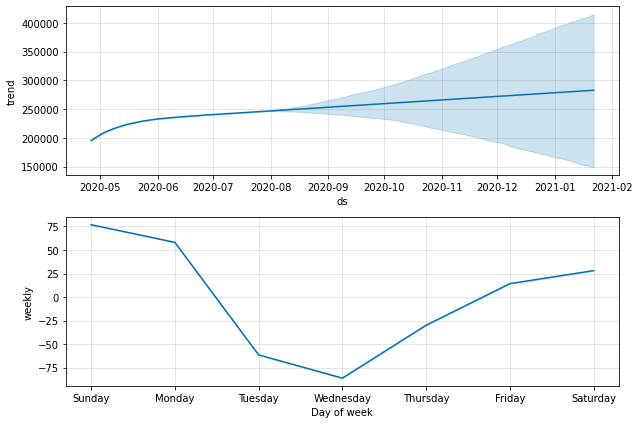

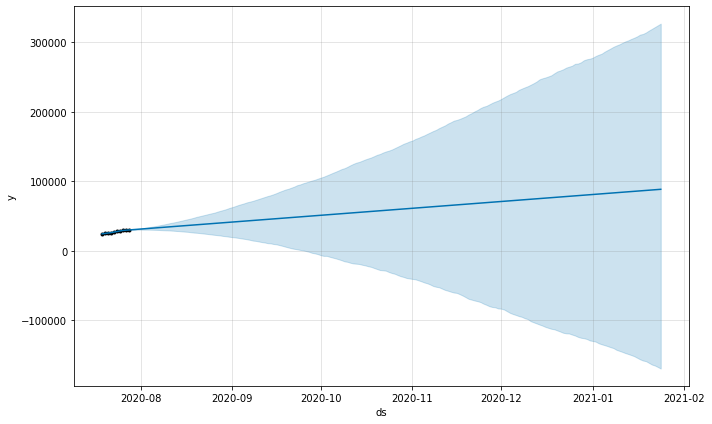

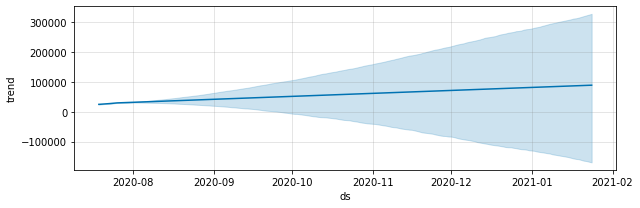

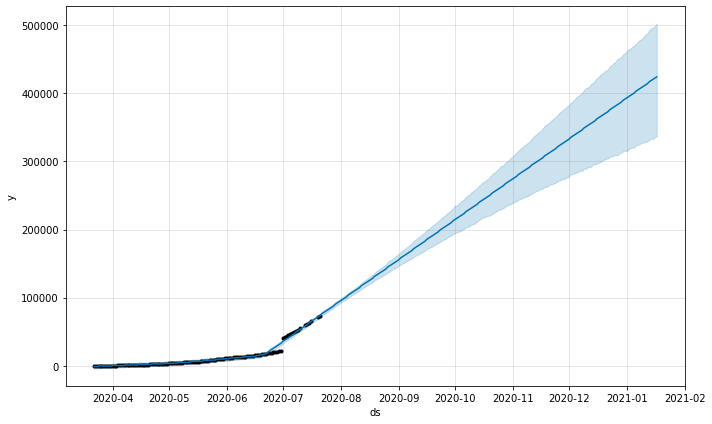

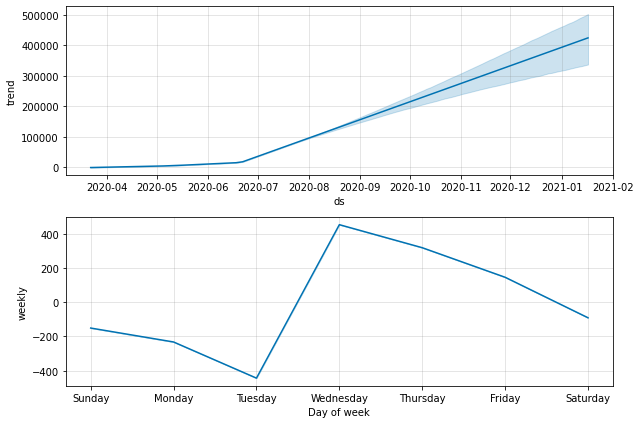

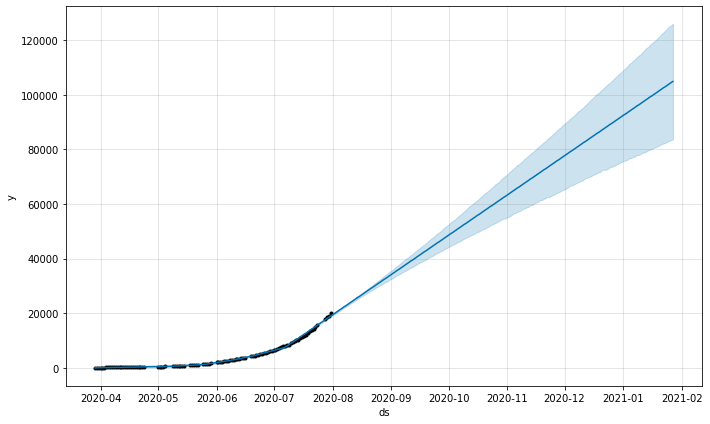

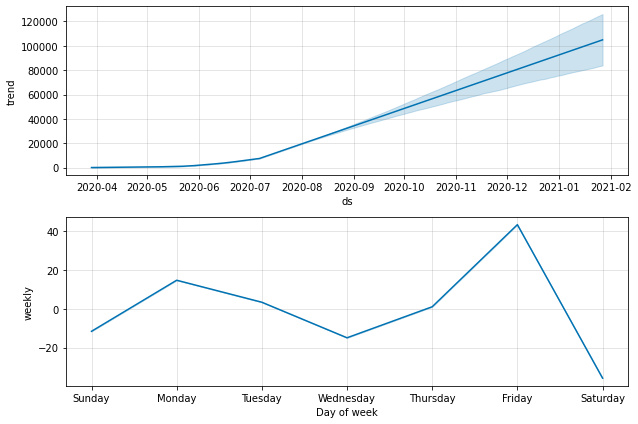

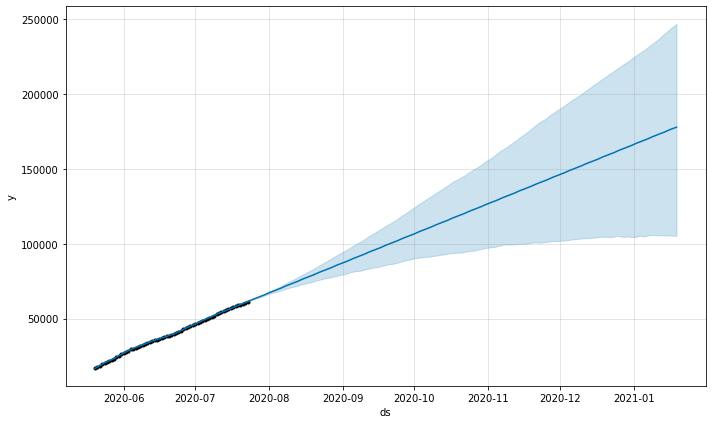

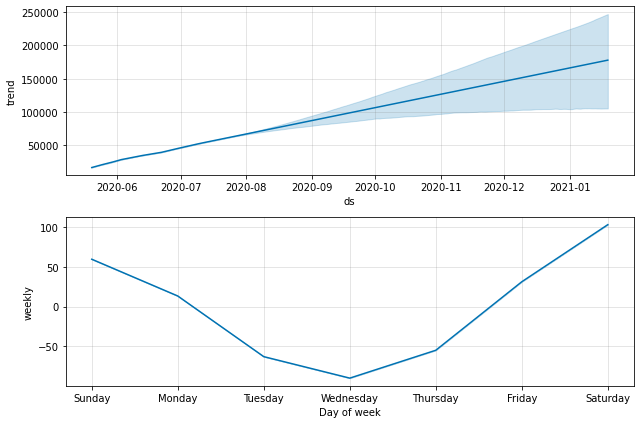

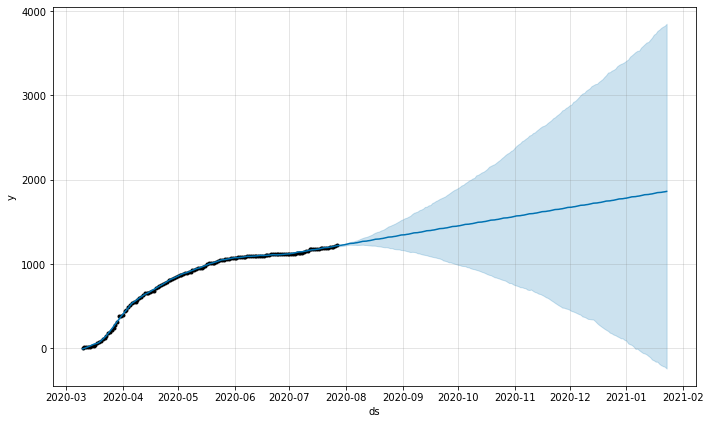

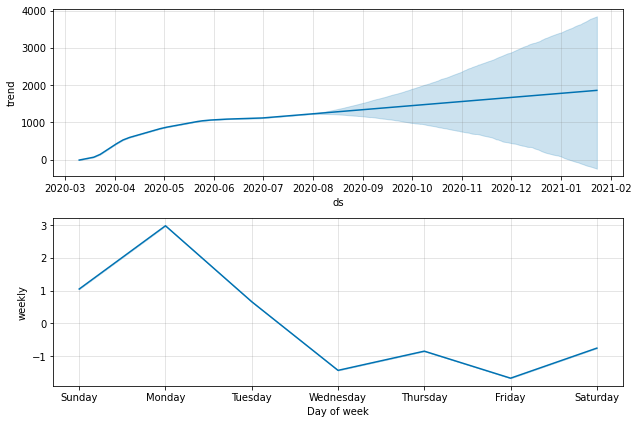

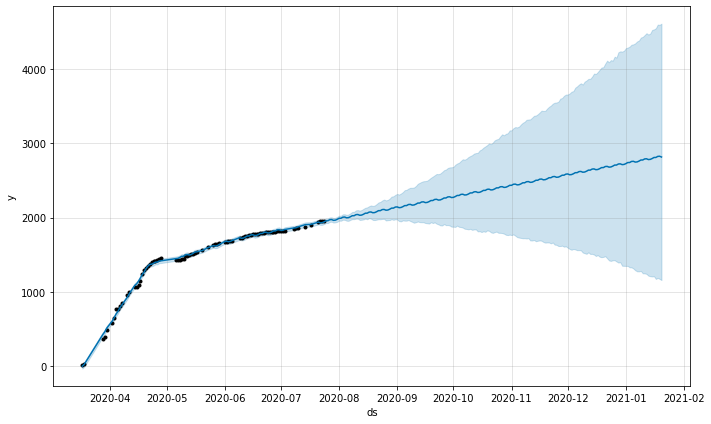

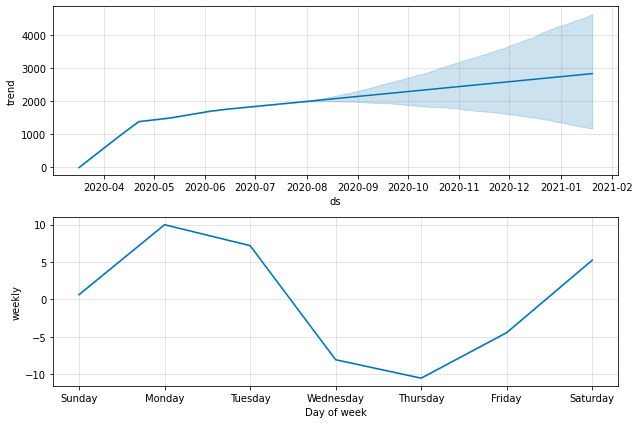

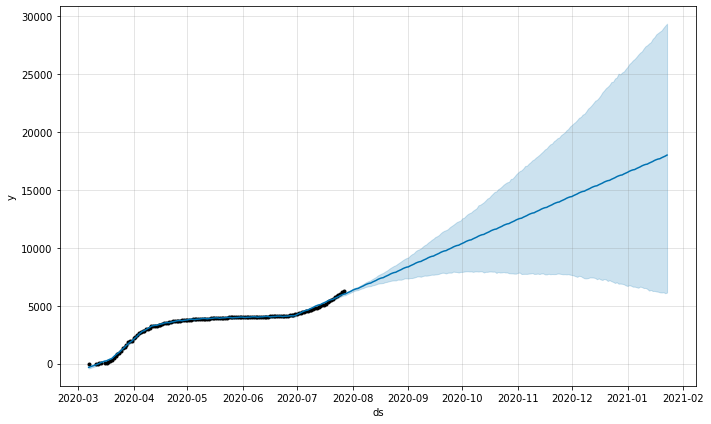

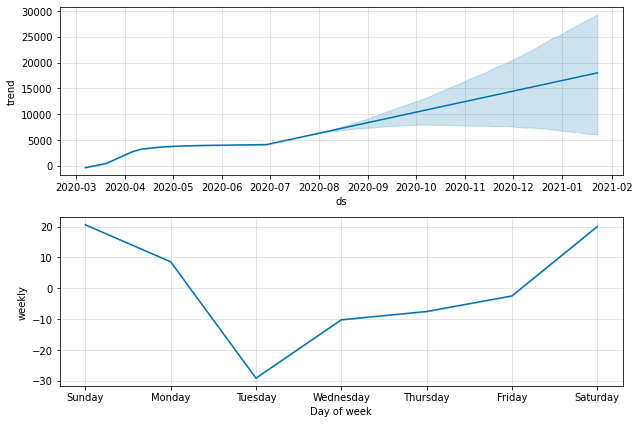

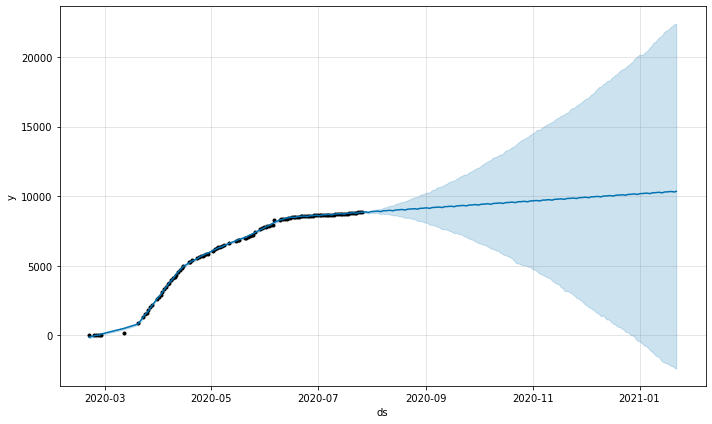

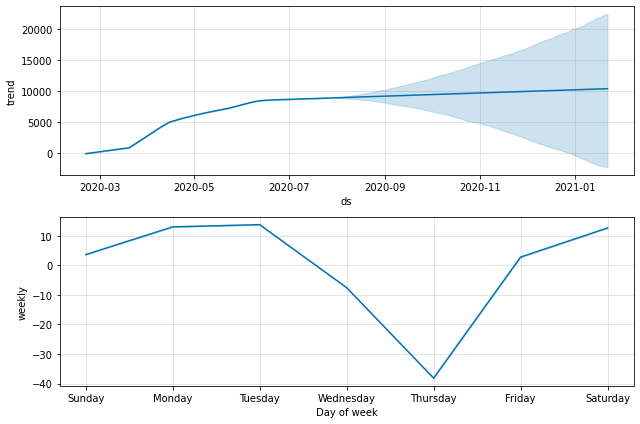

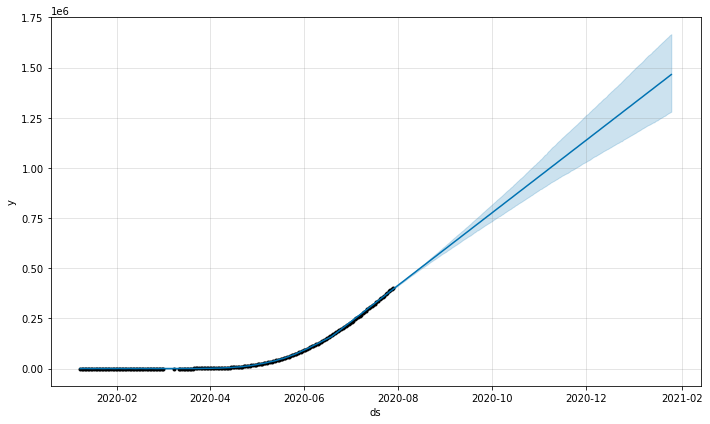

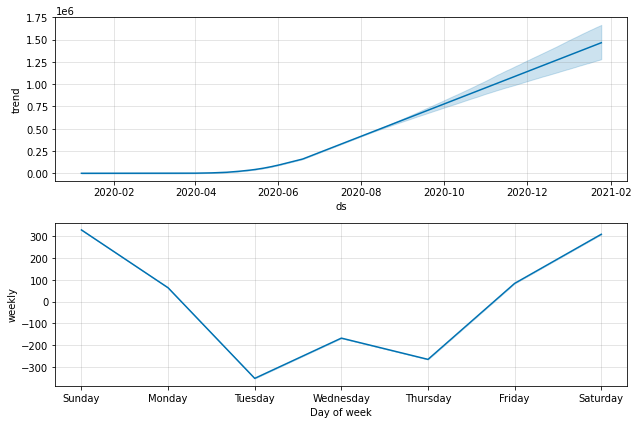

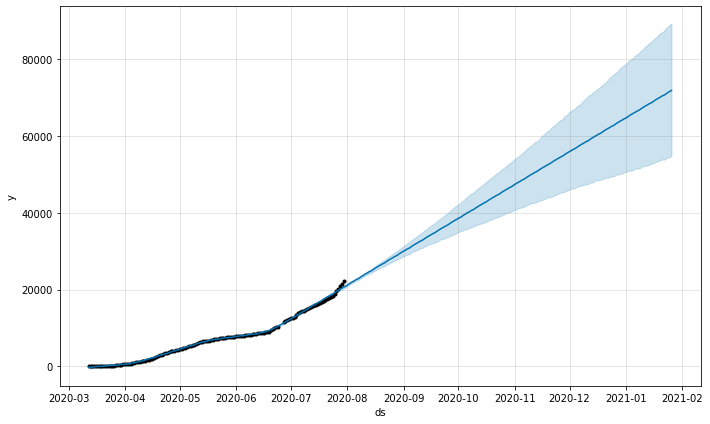

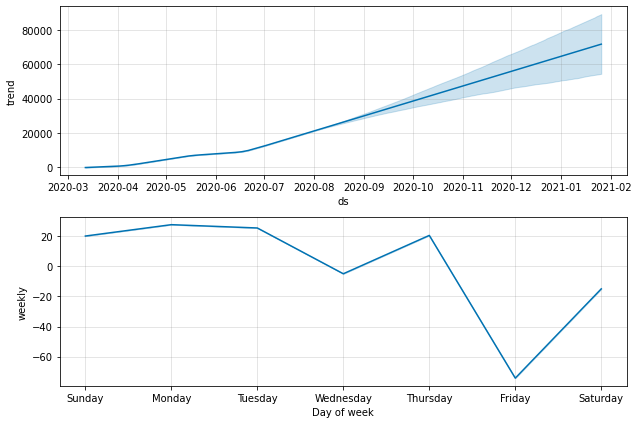

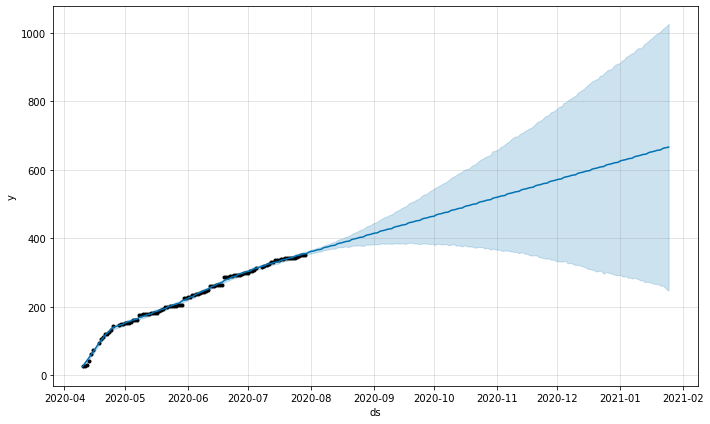

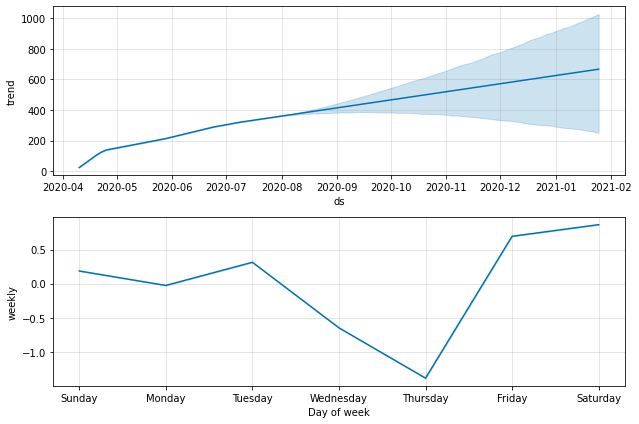

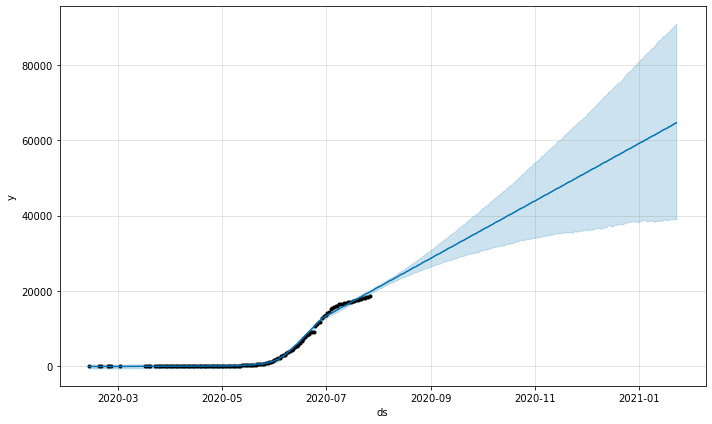

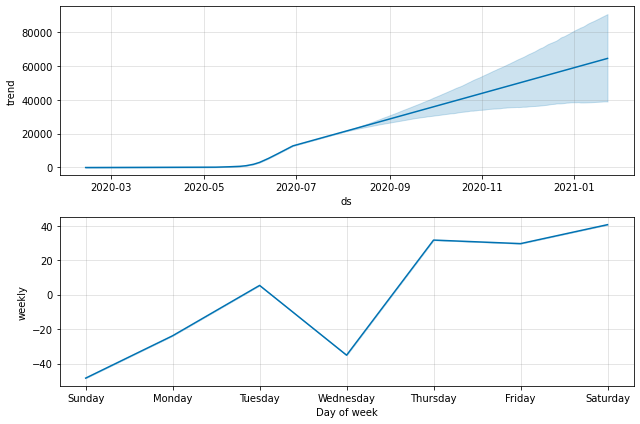

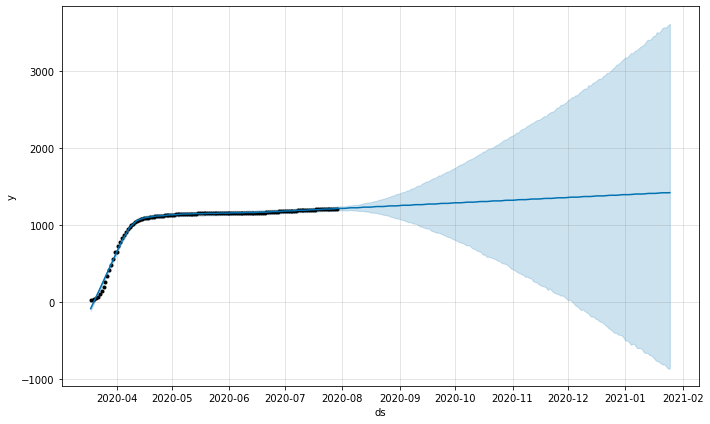

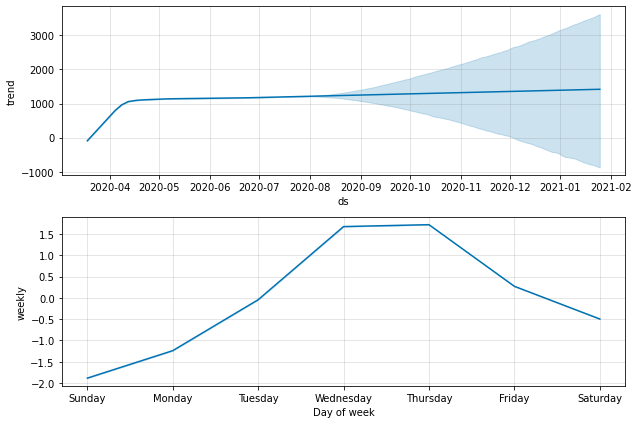

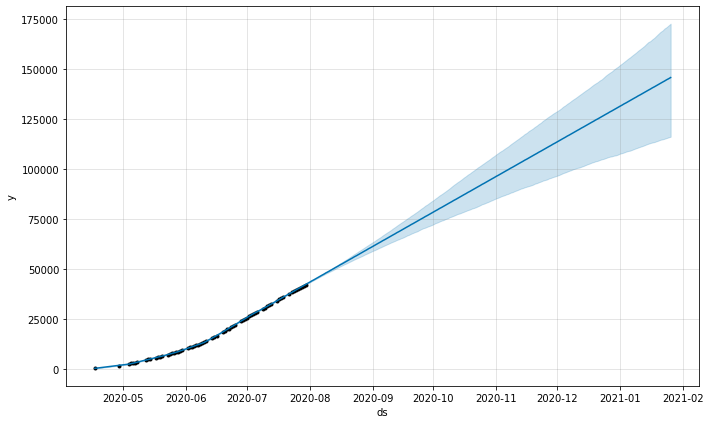

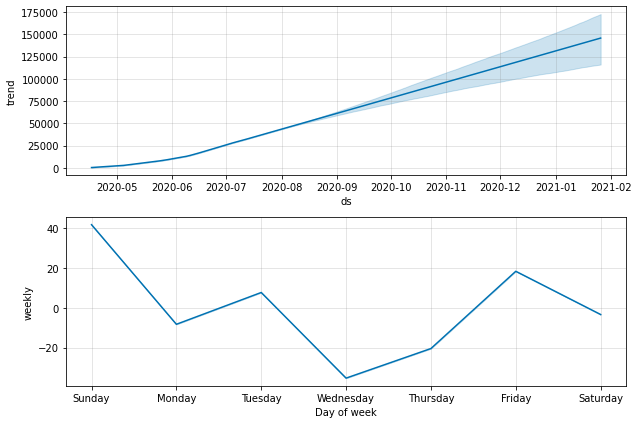

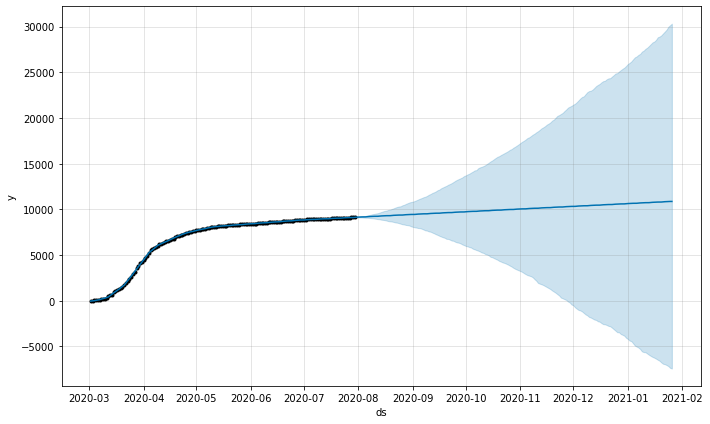

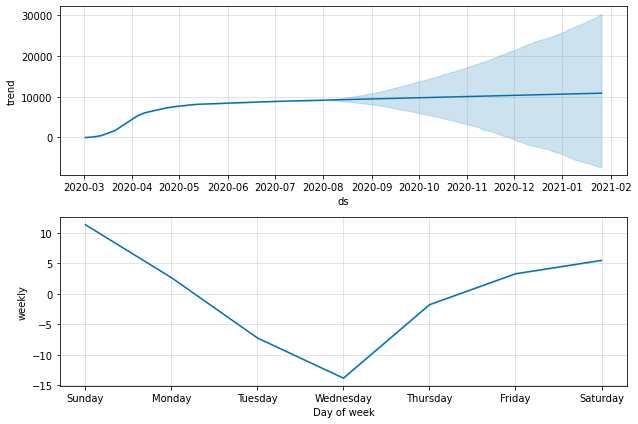

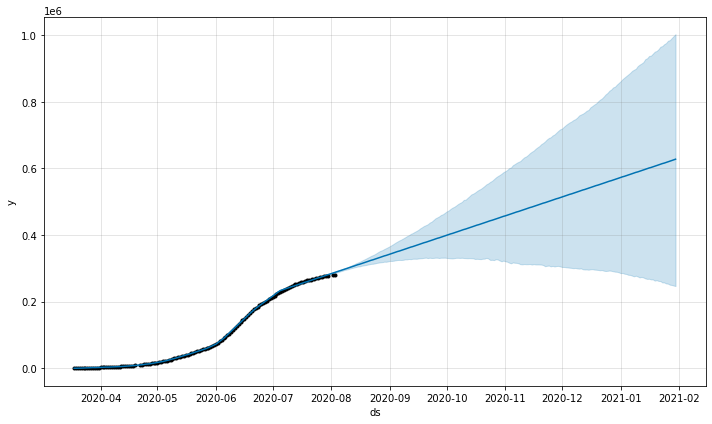

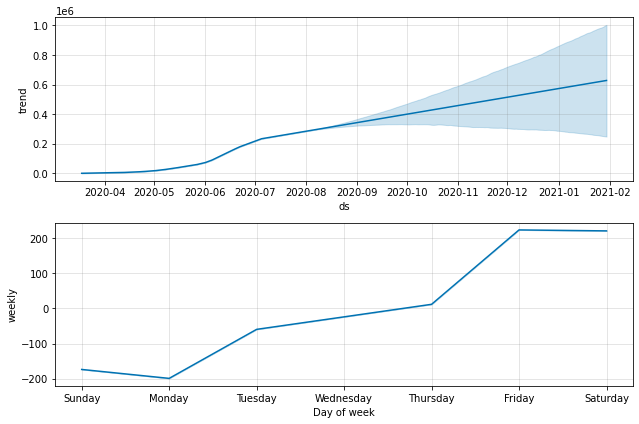

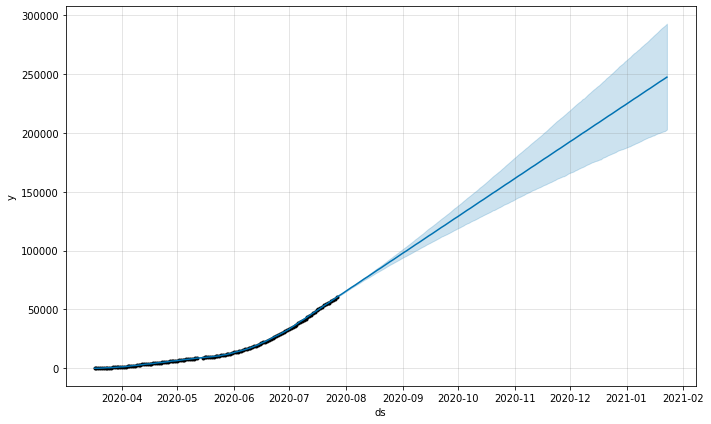

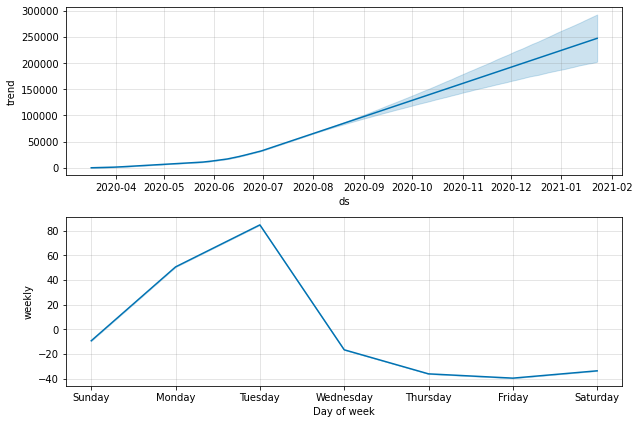

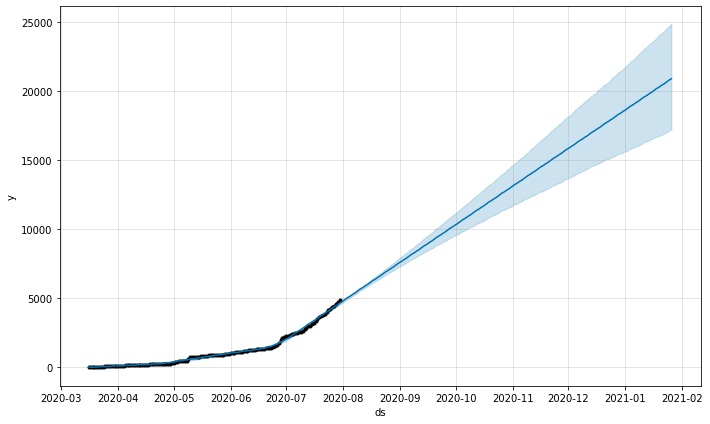

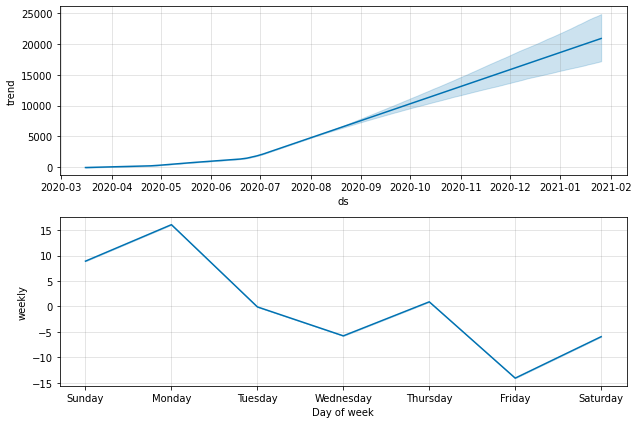

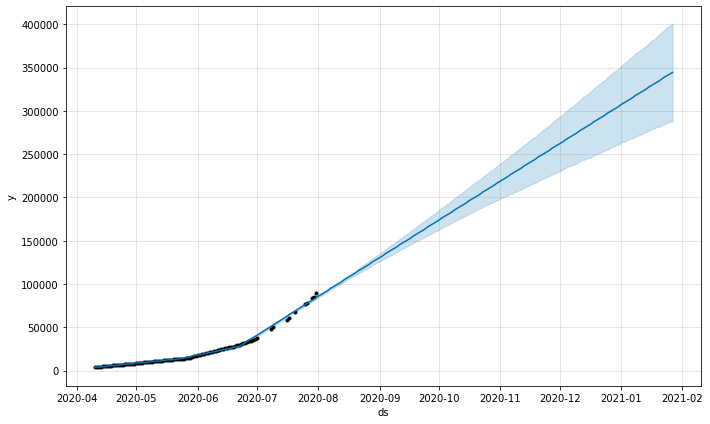

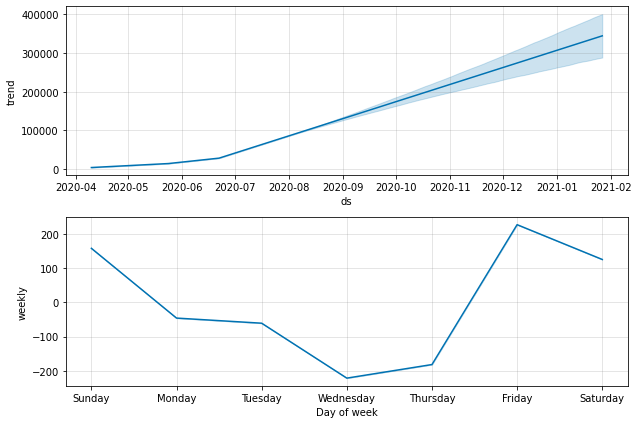

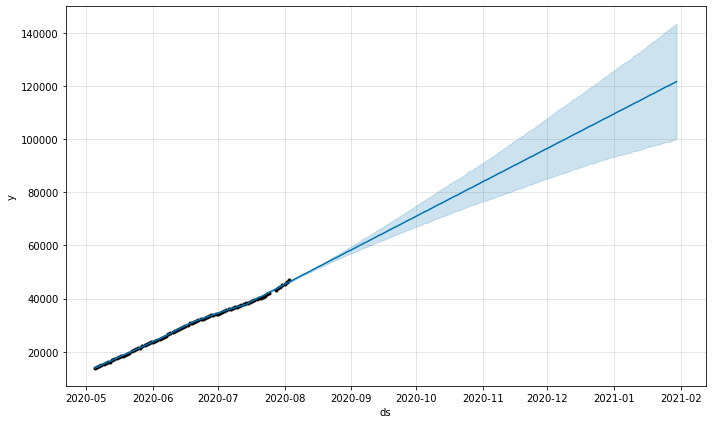

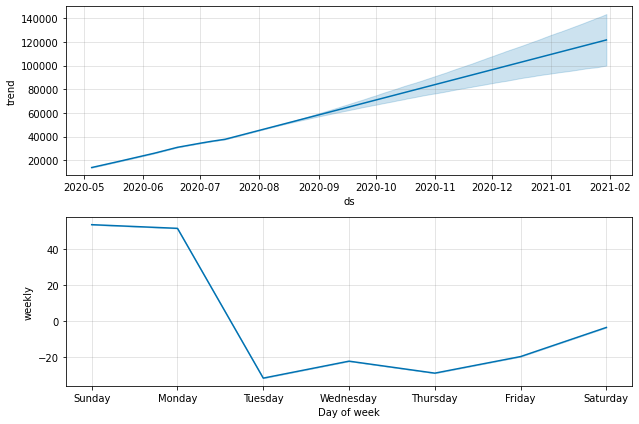

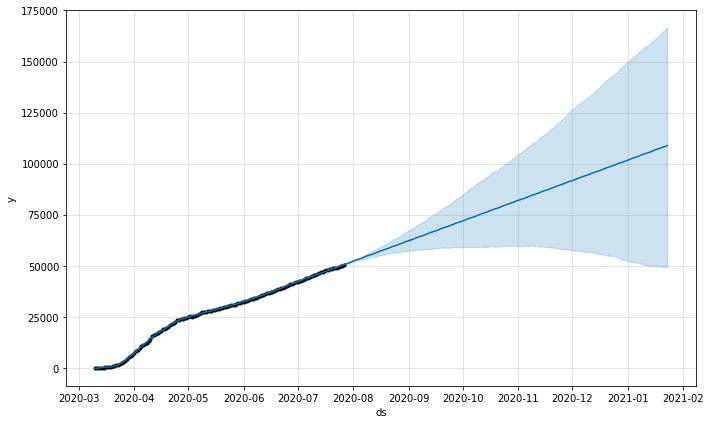

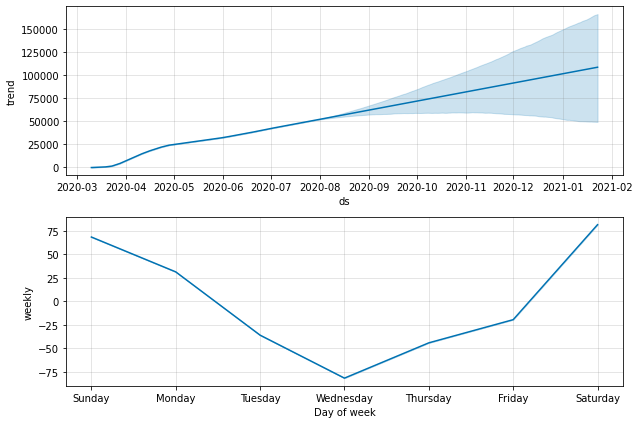

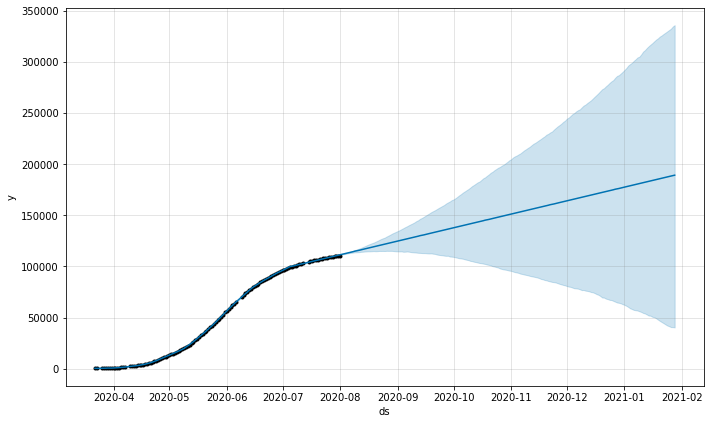

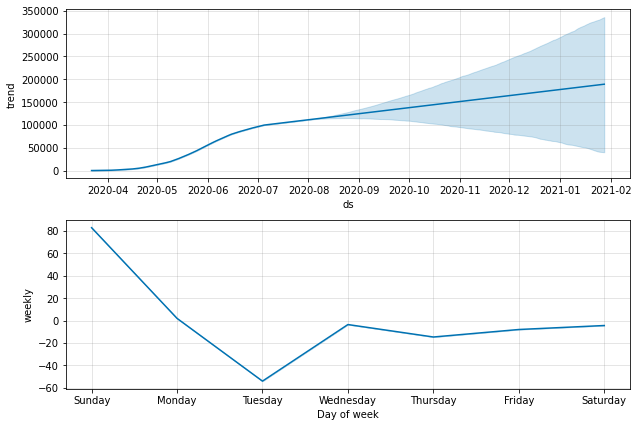

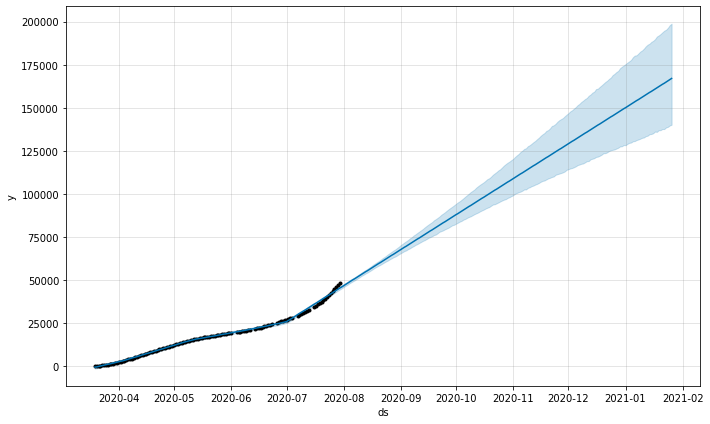

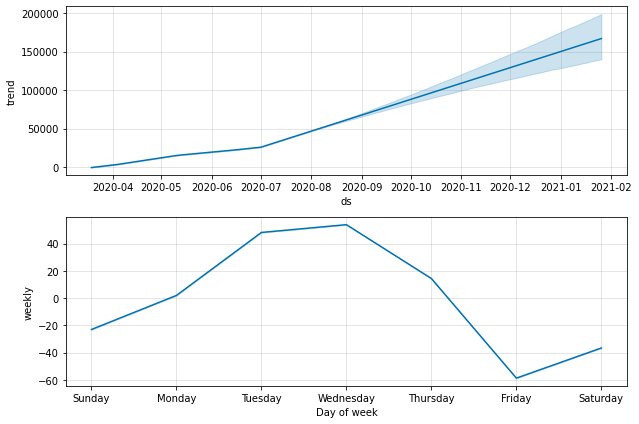

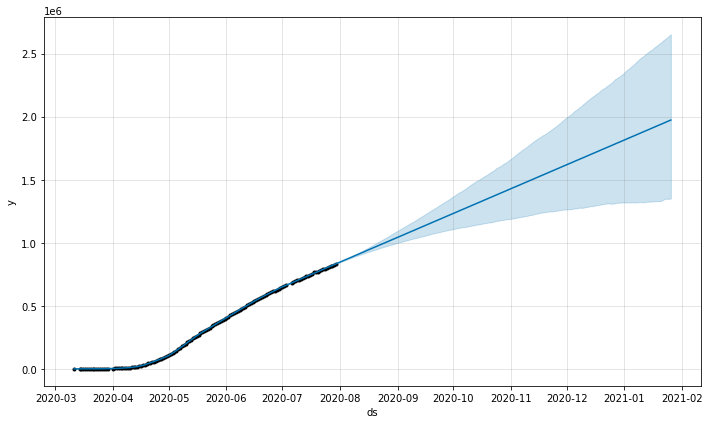

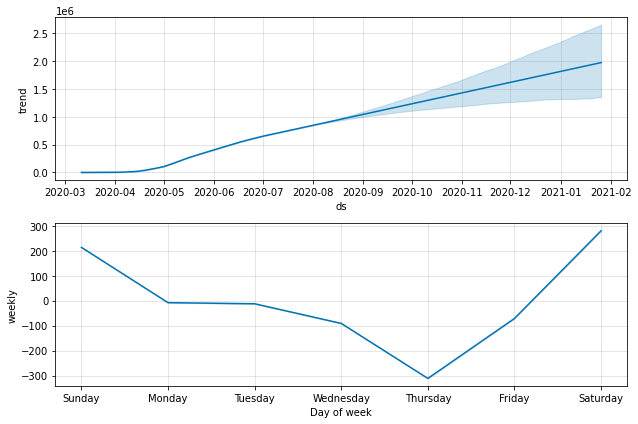

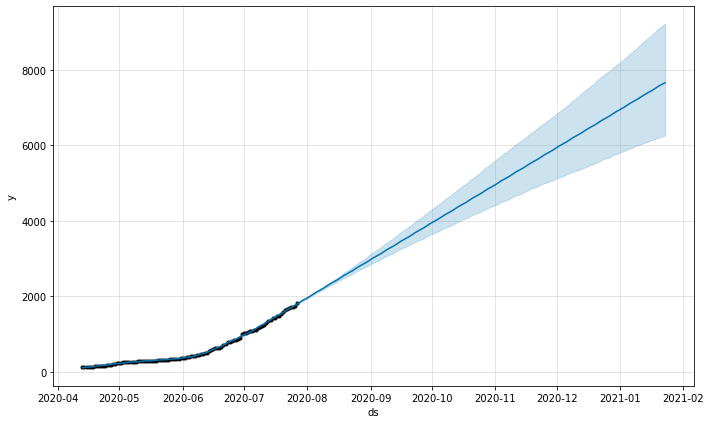

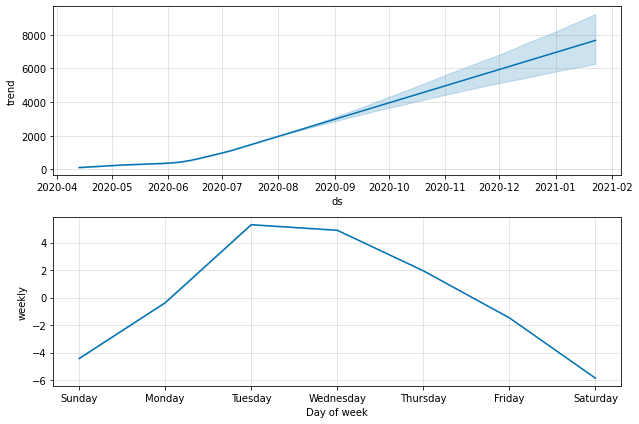

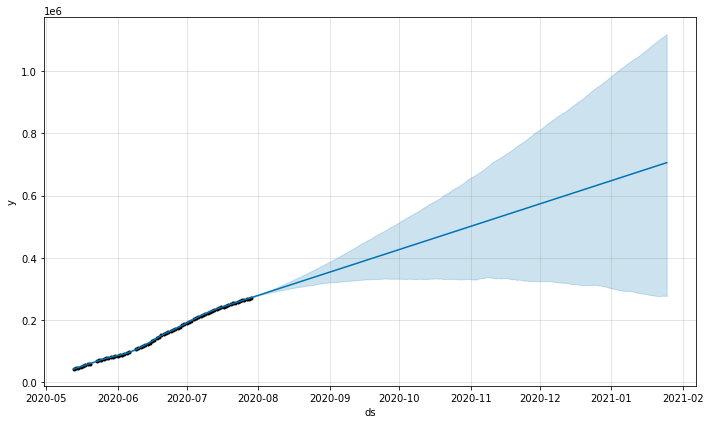

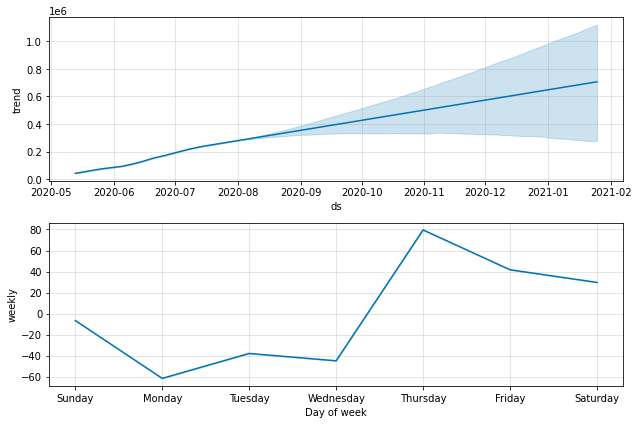

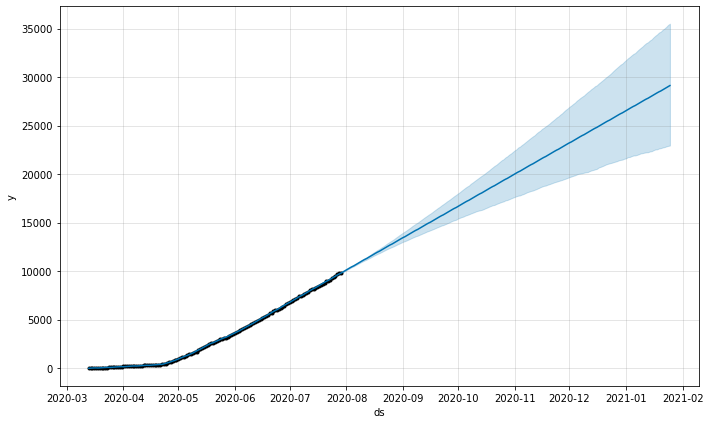

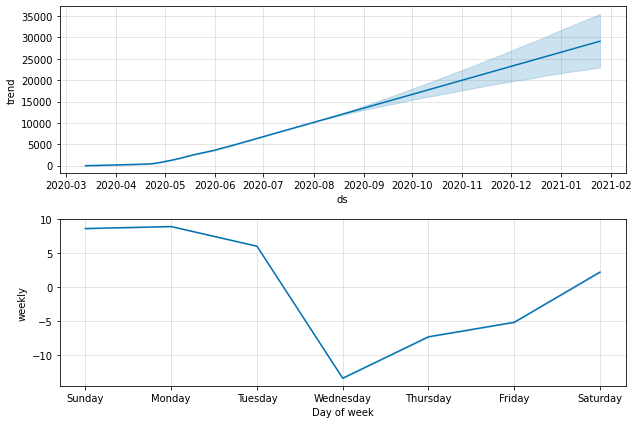

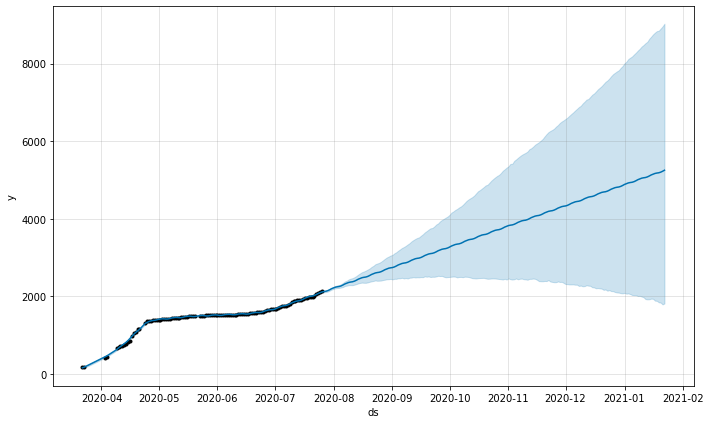

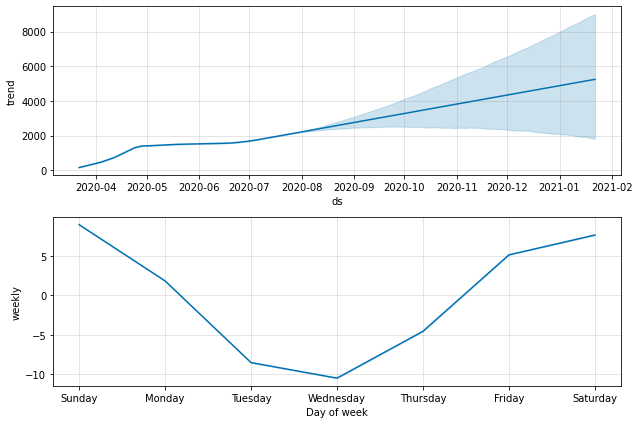

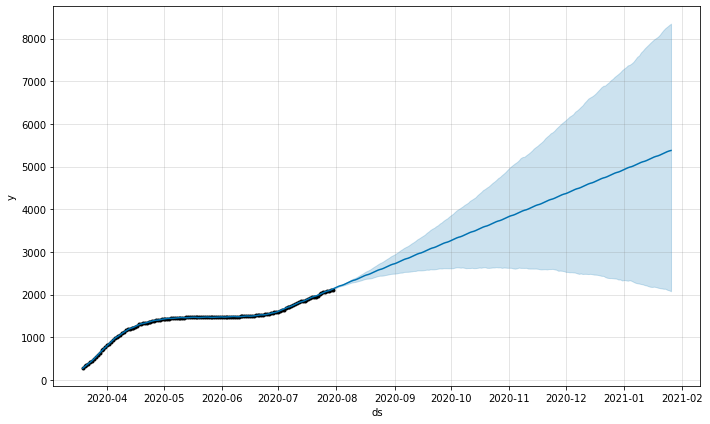

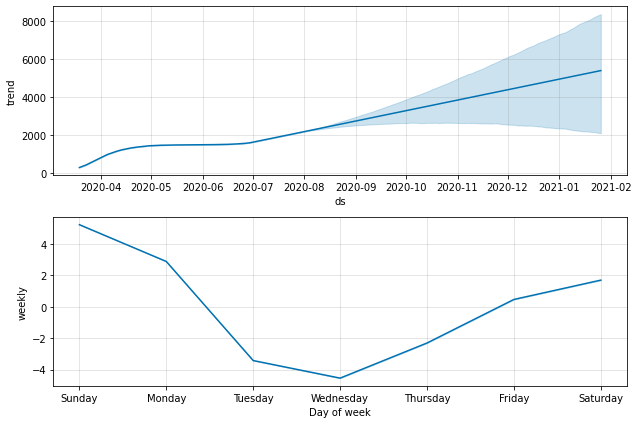

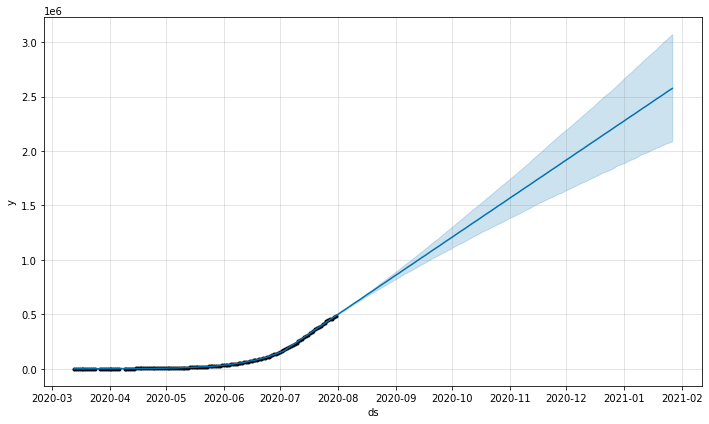

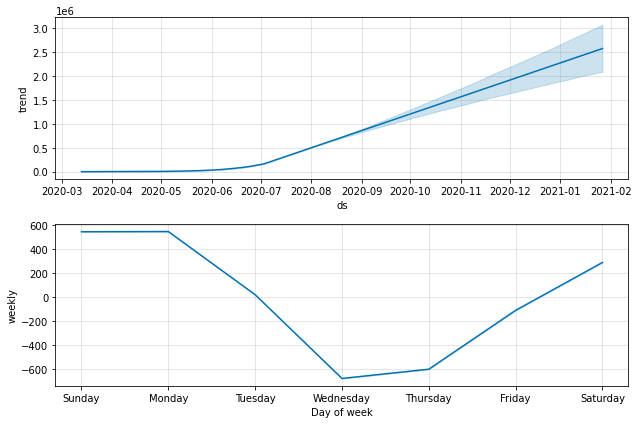

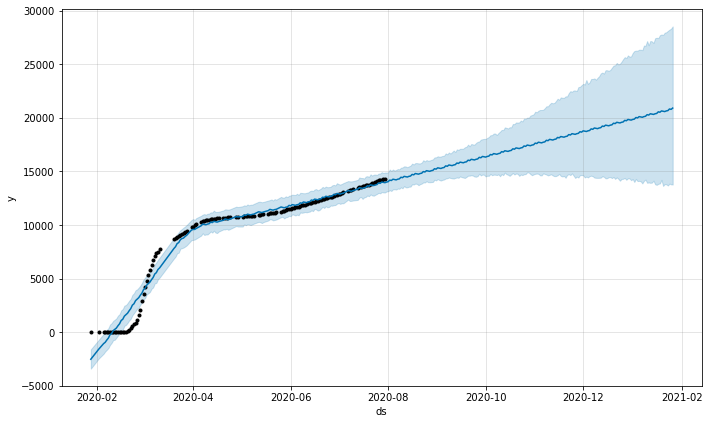

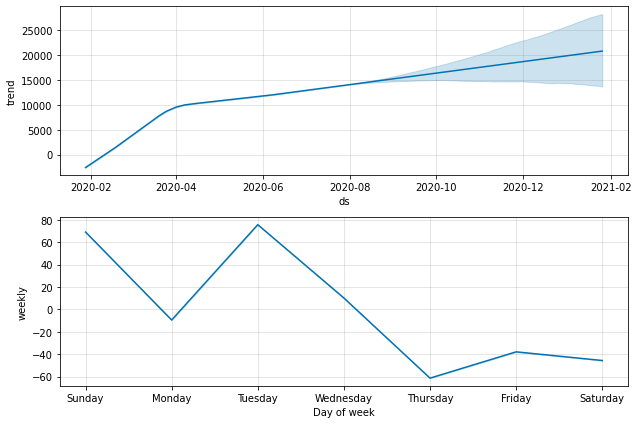

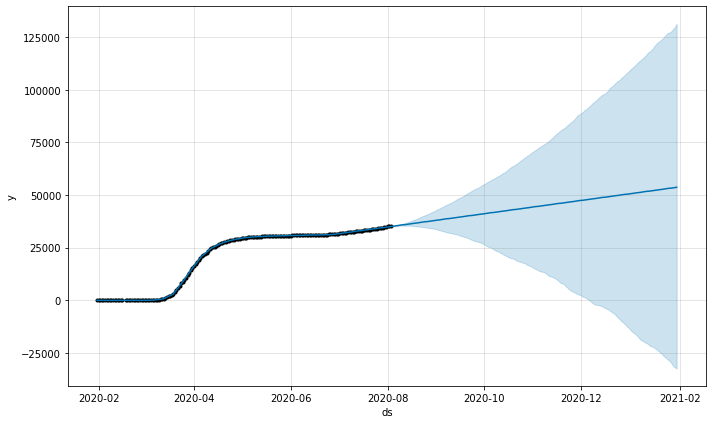

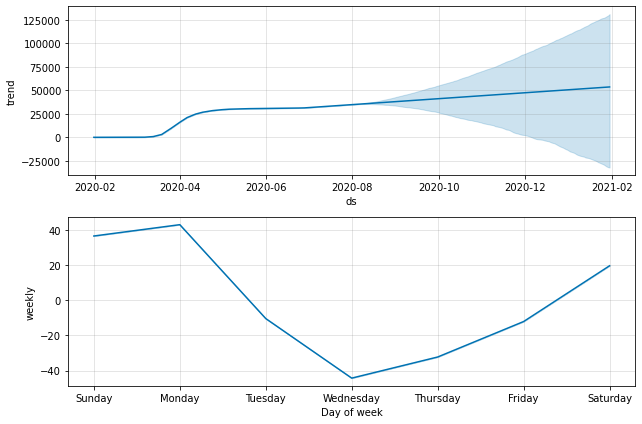

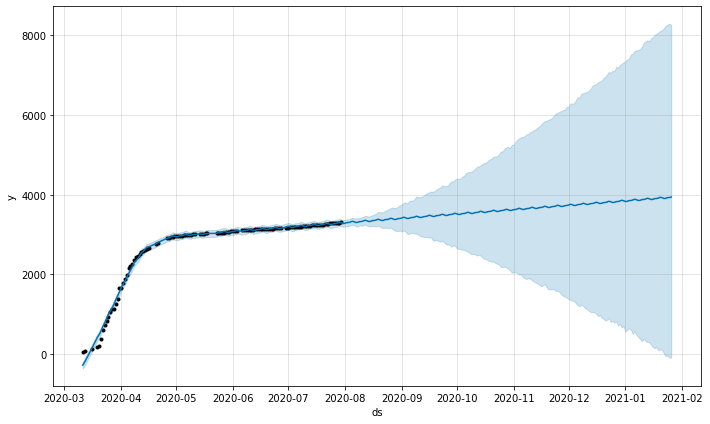

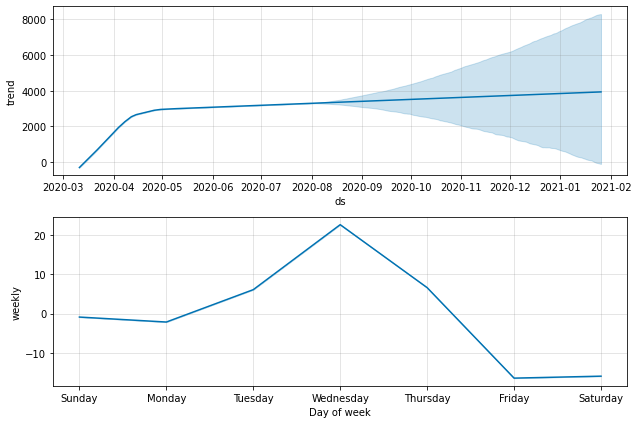

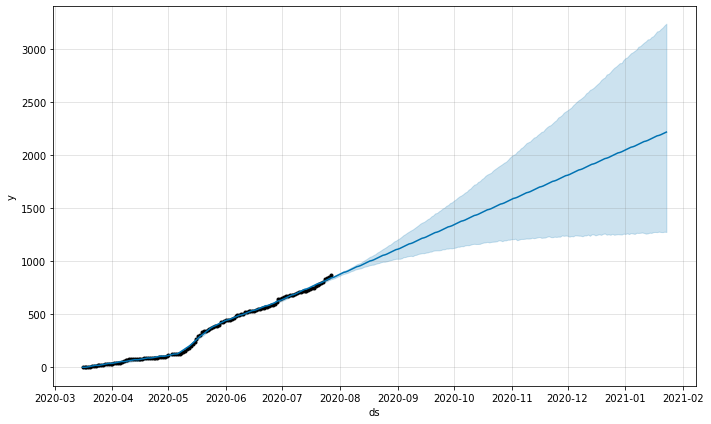

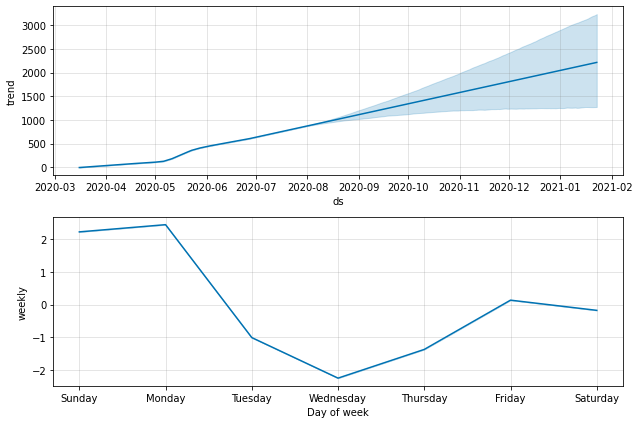

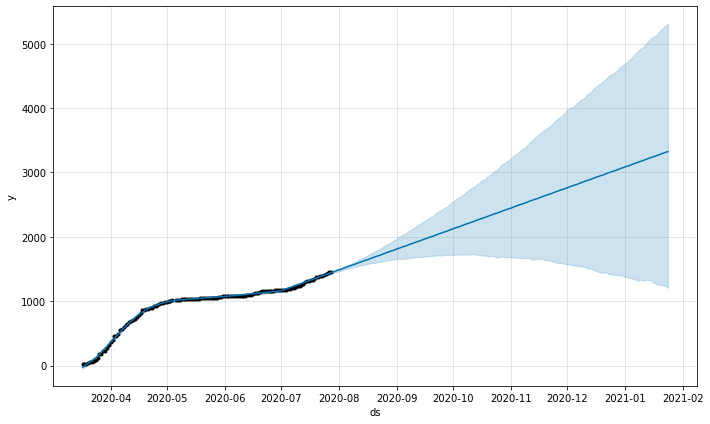

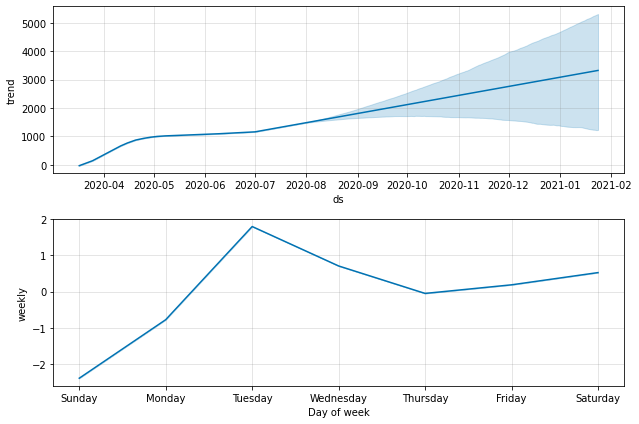

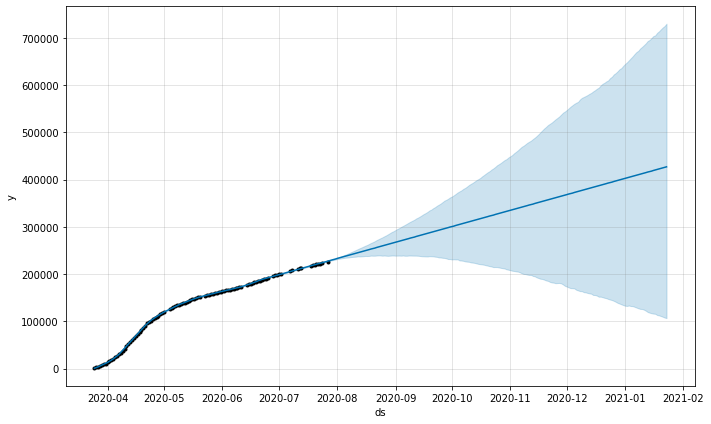

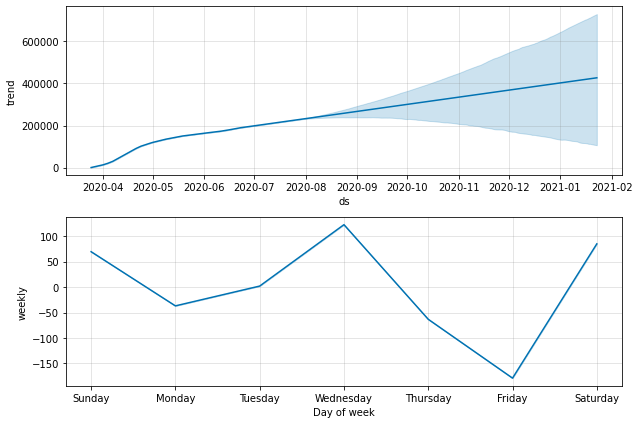

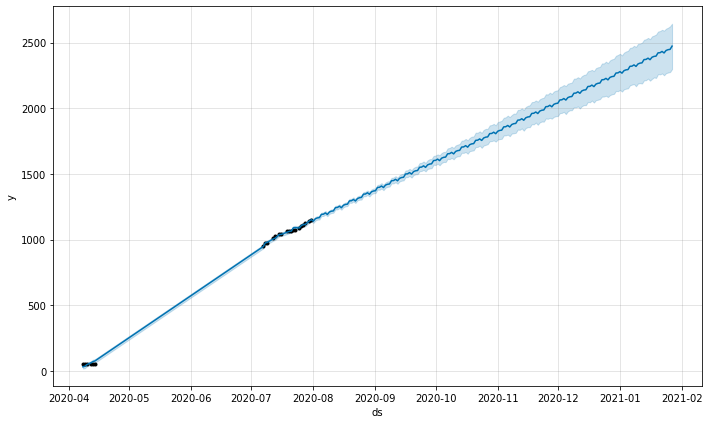

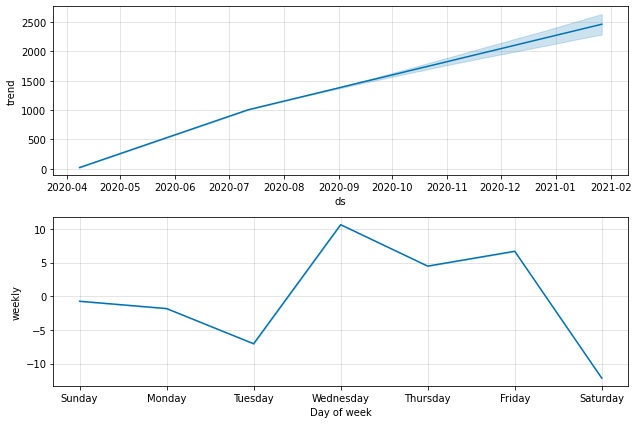

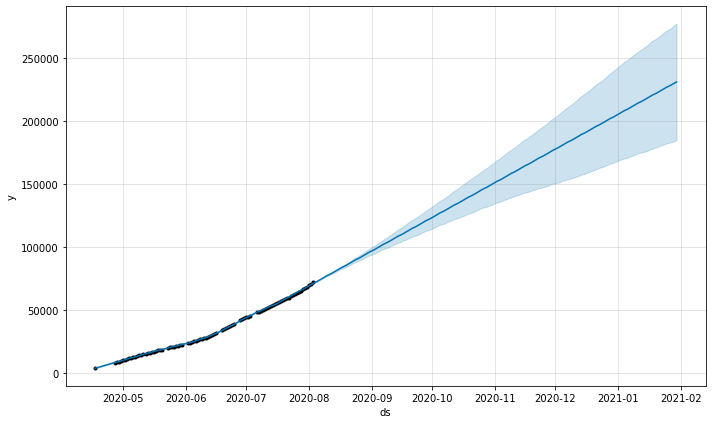

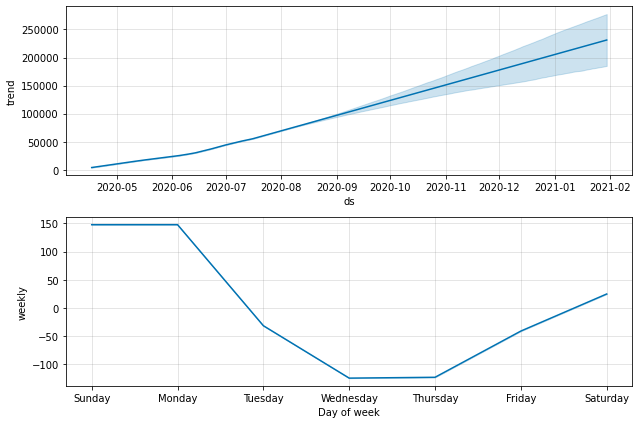

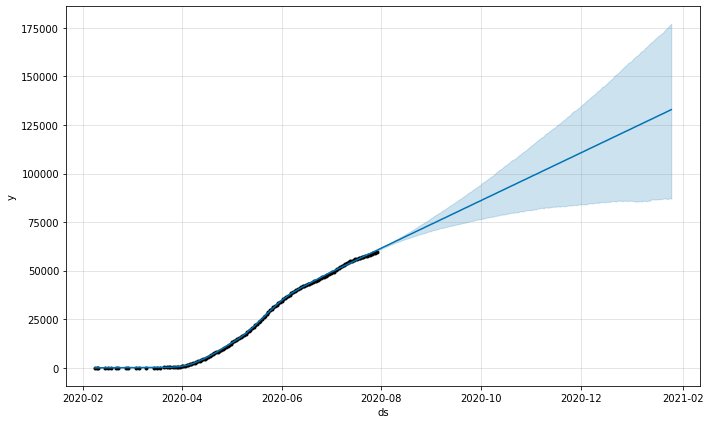

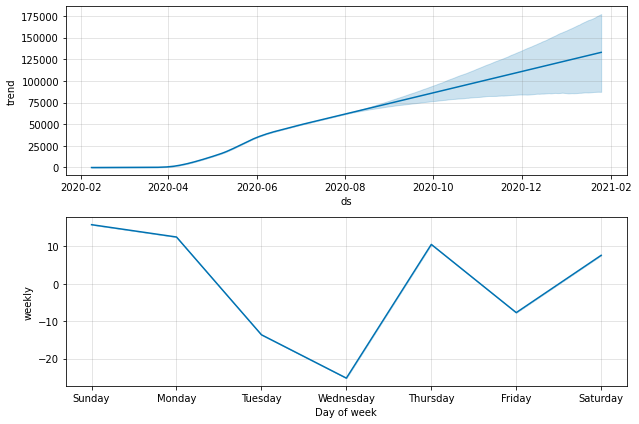

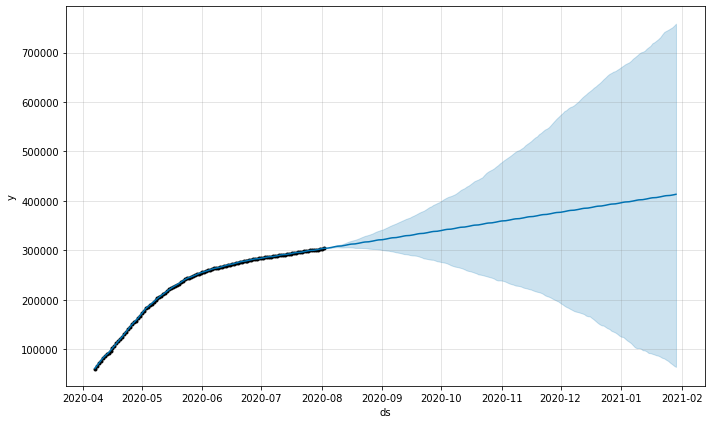

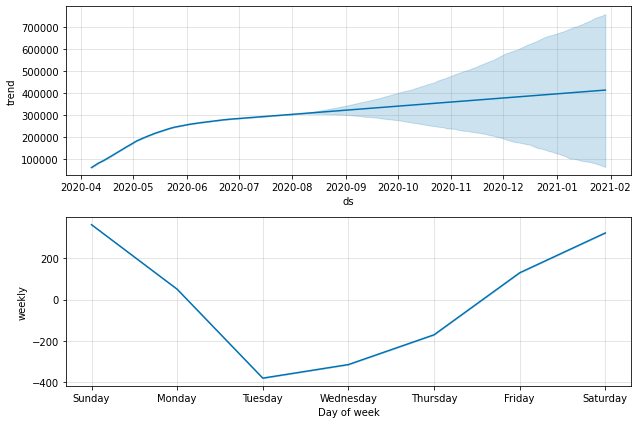

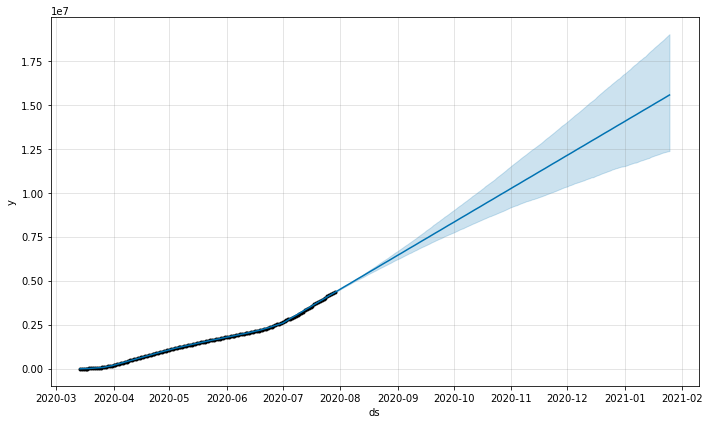

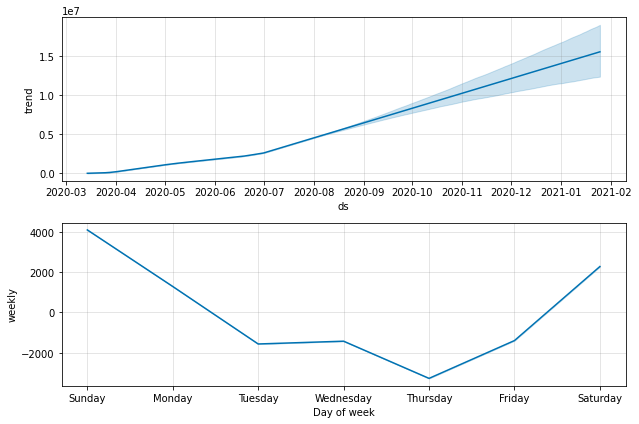

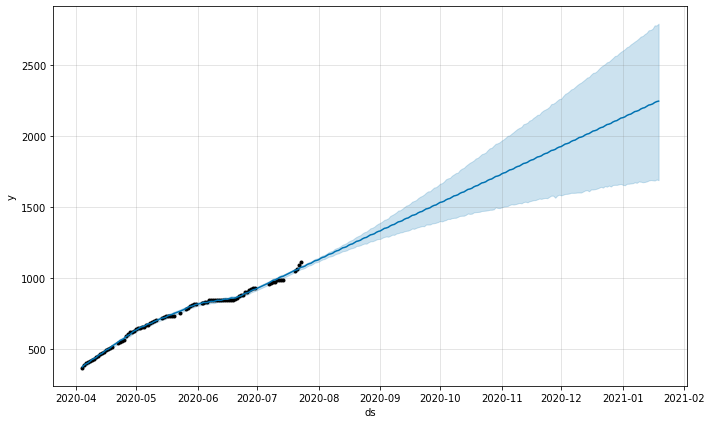

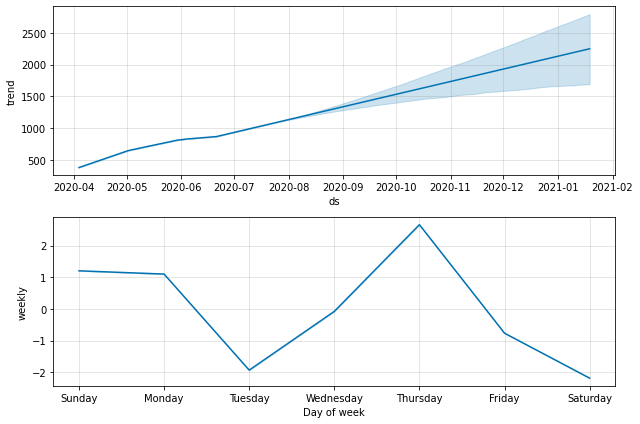

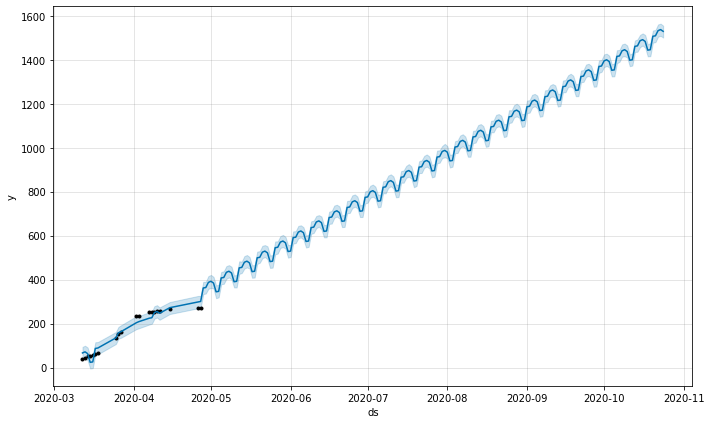

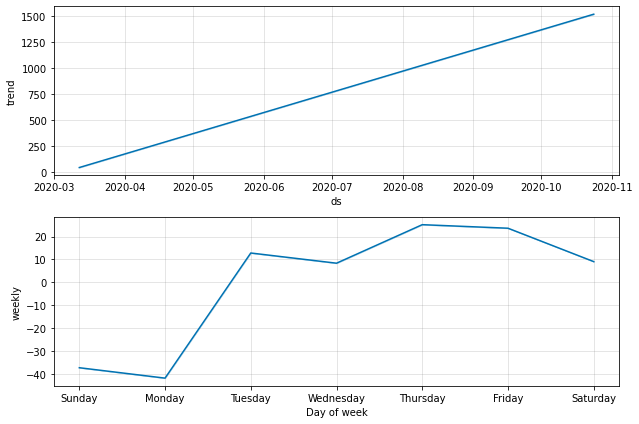

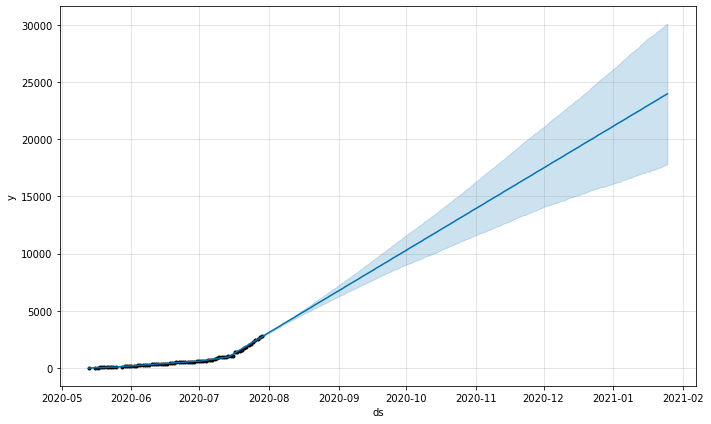

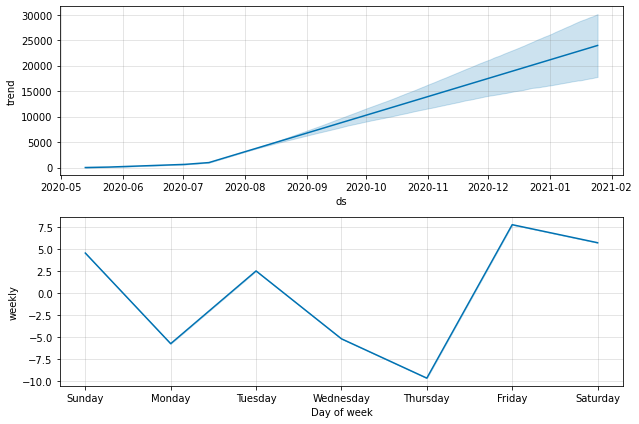

In [61]:
location_model_score = {}
for location in separated_location_df: 
    print(location)
    location_model_score = prophet_predicts(separated_location_df[location])